In [1098]:
import pandas as pd
import os
import numpy as np
import sklearn
import seaborn as sns

from IPython import display

# Because we have runned the code multiple times
import warnings
warnings.filterwarnings('ignore')

# Plot pretty:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures:
#figures_path = "/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/Speciale_dokument/figures"
#IMAGES_PATH = os.path.join(figures_path, "images")
#os.makedirs(IMAGES_PATH, exist_ok=True)
#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
#    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#    print("Saving figure", fig_id)
#    if tight_layout:
#        plt.tight_layout()
#    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1099]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score


from sklearn.model_selection import StratifiedShuffleSplit

from feature_engine import encoding


In [1100]:
rawData = pd.read_csv("rawData_final.csv")
def get_shape(data):
    print("Shape of data: \n"
        " sample size: ", data.shape[0], 
        "\n feature size: " , data.shape[1])
get_shape(rawData) 

Shape of data: 
 sample size:  57011 
 feature size:  219


In [1101]:
bolean_raw = rawData.duplicated(subset = 'address.gstKvhx', keep = 'last')
print("Number of duplicates (excl. the kept): ", len(bolean_raw[bolean_raw == True ]))
housing_data = rawData[bolean_raw == False]

get_shape(housing_data)

Number of duplicates (excl. the kept):  12206
Shape of data: 
 sample size:  44805 
 feature size:  219


In [1102]:
bolean_friHandel = housing_data['address.latestSale.saleType'] == 'Fri handel'
print("Removing non-fri handel: ", len(bolean_friHandel[bolean_friHandel == False]))
housing_data = housing_data[bolean_friHandel == True]

housing_data.replace('-', np.nan, inplace=True)
housing_data.replace(' - ', np.nan, inplace=True)


get_shape(housing_data)

Removing non-fri handel:  4841
Shape of data: 
 sample size:  39964 
 feature size:  219


In [1103]:
housing_data.head()

housing_data_idx = housing_data.reset_index()

In [1104]:
class DropFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        X_dropped = X.drop(self.variables, axis = 1)
        return X_dropped

In [1105]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X.loc[:,self.variables]

In [1106]:
housing_data.shape

(39964, 219)

In [1108]:
len(sel_num_housing + cat_features + removed_features)

219

In [1109]:
sel_num_housing = ['salePrice_b', 'paymentCash_b',
       'AVM_pris_d', 'propertyValuation_b',
       'alfs_areaWeighted', 'buildYear_b', 'radonRiskCategory_d',
       'salesYear_b','Boligstørrelse', 'alfs_area', 
       'alfs_areaBasement', 'Kælder',
       'Vægtet Areal',
       'alfs_numberOfRooms', 'Antal værelser','alfs_buildYear_d',
       'propertyCharges',
       'alfs_postal', 
       'salesPeriod', 'address.latestForSale.dateAnnounced', 
       'address.latestForSale.dateAdded', 
       'address.latestForSale.dateRemoved', 
       'address.latestForSale.salesPeriodTotal',
       'areaResidential_b',
       'numberOfFloors_b', 'floor_b',
       'alfs_rebuildYear', 'Opførselsesår', 
       'Antal Etager', 'numberOfToilets_bd', 'numberOfBaths_bd',
       'turnoutVote_d', 'daycare_h',
       'doctor_h', 'hospital_h', 'junction_h', 'metro_h', 'school_h',
       'busstop_h', 'strain_h', 'supermarket_h', 'train_h', 'library_h',
       'pharmacy_h', 'coast_h', 'forest_h', 'lake_h', 'airport_h',
       'sportshall_h', 'publicbath_h', 'soccerfield_h', 'roadtrain_h',
       'priceIndex_s', 'priceChangeMPriorIndex_s', 'priceChangeYPriorIndex_s',
       'latitude_b', 'longitude_b',
       'Ombygningsår', 'rebuildYear_b',
        'breakInStatistic',
        'WaterHardness',
        "unemploymentRateCPH_s", "unemploymentRateDK_s", "mortgageRate_s", "OMXC20_s",
                  "Bygning, Samlet areal", "aboveSea_d"]


cat_features = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 
                'heating_d', 'biggestParty_d', 'noise_d','energyMark_b', 
                'radonRisk_d', 'floodingRisk_d', 'quarter_b', 'quarter0_b', 
                'kitchen.content_d', 'itemTypeName_b', 'itemtypeName', "city_b", "electionArea_d"]

removed_features = ["address.gstKvhx","municipalityNumber_b","address.oisPropertyNumber","address_b",
"street_b","streetName_b","address.itemType",
"address.itemTypeNumber","address.mapPosition.hasCoordinates","address.wishPropertyLocationLink",
"address.hasEnergyMark","address.energyMark","address.energyMarkLink",
"address.environmentData.soilContamination","address.environmentData.serviceStatus.renewTicket",
"address.environmentData.serviceStatus.errorCode","address.environmentData.serviceStatus.errorText",
"address.environmentData.serviceStatus.errorId",
"address.latestValuation.valuationYear","address.latestValuation.valuationDate",
"valuationDate_b","address.latestValuation.farmhouseParcelValuation",
"address.latestValuation.farmhousePropertyValuation",
"address.latestSale.saleTypeId",
"address.latestForSale.id","address.latestForSale.propertyNumberAgent","address.latestForSale.addressId",
"address.latestForSale.isArchive","address.latestForSale.uniqueNumber",
"address.latestForSale.description","address.latestForSale.descriptionHeadline",
"address.latestForSale.priceDevelopment" ,"address.latestForSale.priceDevelopmentHistoric",
"address.latestForSale.usageExpenses","address.latestForSale.paymentGross",
"address.latestForSale.paymentNet","address.latestForSale.paymentExpenses","address.latestForSale.itemType",
"address.latestForSale.itemTypeNumber","address.latestForSale.marketingItemType","address.latestForSale.address",
"address.latestForSale.streetName","address.latestForSale.houseNumber","address.latestForSale.city",
"address.latestForSale.placeName","address.latestForSale.placeNameSeparator",
"address.latestForSale.imageLink600X400",
"address.latestForSale.canShowSalesPeriodTotal",
"address.latestForSale.areaParcel",
"address.latestForSale.areaWeightedAsterix","address.latestForSale.areaWeightedTitleMessage",
"address.latestForSale.areaWeightedKrM2Title",
"address.latestForSale.agentChainName","address.latestForSale.agentId",
"address.latestForSale.agentsLogoLink",
"address.latestForSale.propertyLink","address.latestForSale.redirectLink",
"address.latestForSale.floorName","address.latestForSale.memberOfDe",
"address.latestForSale.hasEnergyMark","address.latestForSale.energyMarkLink",
"address.latestForSale.hasOpenHouse",
"address.latestForSale.nextOpenHouse",
"address.latestForSale.nextOpenHouseShort","address.latestForSale.nextOpenHouseSignup",
"address.latestForSale.municipalityNumber",
"address.latestForSale.oisPropertyNumber","address.latestForSale.isFavorite","address.latestForSale.hasComment",
"address.latestForSale.comment",
"address.latestForSale.rentalLink","address.latestForSale.linkDomain",
"address.latestForSale.propertyPartiallyOwnedFinancialData","address.latestForSale.mapPosition.hasCoordinates",
"address.latestForSale.mapPosition.latLng.lat","address.latestForSale.mapPosition.latLng.lng",
"address.latestForSale.videoRedirectLink","address.latestForSale.openHouseRedirectLink",
"address.latestForSale.projectSale",
"address.latestForSale.kvhx","address.latestForSale.gstKvhx","address.latestForSale.wishPropertyLocationLink",
"address.latestForSale.hasRentalLink","address.latestForSale.hasVideoLink",
"address.latestForSale.rating.ratings.conditionRating",
"address.latestForSale.rating.ratings.kitchenRating","address.latestForSale.rating.ratings.locationRating",
"address.latestForSale.rating.ratings.bathRating",
"address.latestForSale.rating.averageRating","address.latestForSale.rating.roundAverageRating",
"address.latestForSale.oisHidden","address.latestForSale.nextOpenHouseTime",
"address.latestForSale.calculateLoanAgentChain","address.latestForSale.label","address.latestForSale",
"address.latestValuation","address.environmentData.breakInStatistic","address.latestForSale.mapPosition.latLng",
"address.mapPosition.latLng","dingeo_link",
"address.latestSale","address.latestForSale.propertyPartiallyOwnedFinancialData.purchasePrice",
"address.latestForSale.propertyPartiallyOwnedFinancialData.maximumPriceRatio",
"address.latestForSale.propertyPartiallyOwnedFinancialData.maximumPrice",
"address.latestForSale.propertyPartiallyOwnedFinancialData.housingAssociationDebtShare",
"address.latestForSale.propertyPartiallyOwnedFinancialData.housingAssociationDebt",
"address.latestForSale.propertyPartiallyOwnedFinancialData.financingInformation",
"address.latestForSale.propertyPartiallyOwnedFinancialData.expenseNet",
"address.latestForSale.propertyPartiallyOwnedFinancialData.expenseGross",
"address.latestForSale.propertyPartiallyOwnedFinancialData.estimatedTechnicalPrice",
"address.latestForSale.propertyPartiallyOwnedFinancialData.estimatedTechnicalAreaPrice",
"address.latestForSale.propertyPartiallyOwnedFinancialData.downPayment",
"address.latestForSale.propertyPartiallyOwnedFinancialData.distributionRatio",
"Unnamed: 0", "address.latestForSale.hasAreaWeighted",
"address.latestSale.saleType", "saleDate_b","saleDate_b.1", "previousMonth",
                   "Bevaringsværdig", "Energimærke", "Fredning",
                   "Location", 
                   "address.latestForSale.areaPaymentCash",
                    "address.latestForSale.downPayment",
"address.latestValuation.parcelValuation",
        "address.environmentData.breakInStatistic.countryAverage",
        "address.environmentData.breakInStatistic.countyAverage",
        "address.environmentData.breakInStatistic.riskCategory",
        'priceHouse', 'priceChangeMHouse', 'priceChangeYHouse',
       'priceApartment', 'priceChangeMApart', 'priceChangeYApart']

In [1110]:
class paymentAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables 
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        
        replace_func = np.vectorize(lambda x: float(x.replace('.','')))
        
        rep_X = replace_func(X_.astype(str))
        X_transformed = pd.DataFrame(rep_X, 
                         columns = self.variables)

        X__.drop(self.variables, axis= 1, inplace=True)
        X__[self.variables] = X_transformed[self.variables].values
        return X__
        

pay_vars = ['salePrice_b', 'paymentCash_b', 
            'AVM_pris_d', 'propertyValuation_b']
#        


In [1111]:
### SHould be used as categorical
class itemAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        
        array_X = np.array(X_)
        itemType = np.where((array_X[:, 0] == 'Ejerlejlighed') | \
                            (array_X[:, 0] == 'Rækkehus') | \
                            (array_X[:, 0] == 'Villa') & \
                            (array_X[:, 1] != 'Andelsbolig'), 
                            array_X[:, 0], np.nan)
        
        X_transformed = pd.DataFrame(itemType, 
                         columns = [self.variables[0]])
        X__.drop(self.variables, axis= 1, inplace=True)
        
        X__[self.variables[0]] = X_transformed.values
        return X__
        
item_vars = ['itemTypeName_b', 'itemtypeName']        

In [1112]:
class interiorAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y=None):
        return self  
    def transform(self, X):

        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        
        replace_func = np.vectorize(lambda x: float(x.replace(' m2','')))
        replace_func2 = np.vectorize(lambda x: float(x.replace('nan','0')))
        replace_func3 = np.vectorize(lambda x: float(x.replace(' meter','')))
        
        #rep_X = []
        #for i in self.variables:
        rep_X = replace_func2(replace_func(X_.loc[:,self.variables[:9]].astype(str)).astype(str))
        
        where0_X = np.where(rep_X[:, 1] == 'number', rep_X[:, 1], rep_X[:, 0])
        
        basement = np.where(rep_X[:, 2] == 'number',rep_X[:, 2], rep_X[:, 3])
        where1_X = np.where(basement < 500, 
                            basement, np.nan) #2:basement, 3: kælder
       
        where2_X = np.where(rep_X[:, 5] != 0, rep_X[:, 5], rep_X[:, 4]) 
        where3_X = np.where(rep_X[:, 6] == 'number',rep_X[:, 6], rep_X[:, 7])
        
        where4_X = rep_X[:, 8]
        where5_X = replace_func3(X_.loc[:, self.variables[9]].astype(str))
        
        where6_X = np.where((X_.loc[:, self.variables[10]] < 0) | (X_.loc[:, self.variables[10]] > 10), 
                            np.nan, X_.loc[:, self.variables[10]])
        
        concat_X = np.transpose([where0_X, where1_X, where3_X, where4_X, where5_X, where6_X]) #where2_X, 
        
    
        X_transformed = pd.DataFrame(concat_X, 
                         columns = [self.variables[1], self.variables[2], 
                                     self.variables[6], #self.variables[5],
                                    "BuildingUnion_area", self.variables[9],
                                    self.variables[10]])


        X__.drop(self.variables, axis= 1, inplace=True)
        
        X__[[self.variables[1], "areaBasement", 
             #self.variables[5], 
             "numberOfRooms", 
             "BuildingUnion_area", self.variables[9], self.variables[10]]] = X_transformed.values
        return X__

inter_vars = ['Boligstørrelse', 'alfs_area', 
              'alfs_areaBasement', 'Kælder',
              'Vægtet Areal', 'alfs_areaWeighted',
              'alfs_numberOfRooms', 'Antal værelser', 
              "Bygning, Samlet areal", 
              "aboveSea_d", 'numberOfToilets_bd']    


In [1113]:
class interiorAttributesAdder2(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y=None):
        return self  
    def transform(self, X):

        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        
        replace_func = np.vectorize(lambda x: float(x.replace(' m2','')))
        replace_func2 = np.vectorize(lambda x: float(x.replace('nan','0')))
        replace_func3 = np.vectorize(lambda x: float(x.replace(' meter','')))
        
        rep_X = replace_func2(replace_func(X_.loc[:,self.variables[:8]].astype(str)).astype(str))
        
        where0_X = np.where(rep_X[:, 1] == 'number', rep_X[:, 1], rep_X[:, 0])
        
        basement = np.where(rep_X[:, 2] == 'number',rep_X[:, 2], rep_X[:, 3])
        where1_X = np.where(basement < 500, 
                            basement, np.nan) #2:basement, 3: kælder
       
        where2_X = np.where(rep_X[:, 5] != 0, rep_X[:, 5], rep_X[:, 4]) 
        where3_X = np.where(rep_X[:, 6] == 'number',rep_X[:, 6], rep_X[:, 7])
        
        #where4_X = rep_X[:, 8]
        where5_X = replace_func3(X_.loc[:, self.variables[8]].astype(str))
        
        where6_X = np.where((X_.loc[:, self.variables[9]] < 0) | (X_.loc[:, self.variables[9]] > 10), 
                            np.nan, X_.loc[:, self.variables[9]])
        
        concat_X = np.transpose([where0_X, where1_X, where3_X, where5_X, where6_X]) # where4_X, where2_X, 
        
    
        X_transformed = pd.DataFrame(concat_X, 
                         columns = [self.variables[1], self.variables[2], 
                                     self.variables[6], #self.variables[5],
                                    #"BuildingUnion_area", 
                                    self.variables[8],
                                    self.variables[9]])


        X__.drop(self.variables, axis= 1, inplace=True)
        
        X__[[self.variables[1], "areaBasement", 
             #self.variables[5], 
             "numberOfRooms", 
             #"BuildingUnion_area", 
             self.variables[8], self.variables[9]]] = X_transformed.values
        return X__

inter_vars2 = ['Boligstørrelse', 'alfs_area', 
              'alfs_areaBasement', 'Kælder',
              'Vægtet Areal', 'alfs_areaWeighted',
              'alfs_numberOfRooms', 'Antal værelser', 
              #"Bygning, Samlet areal", 
              "aboveSea_d", 'numberOfToilets_bd']    


In [1114]:

class rebuildYearAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables): 
        self.variables = variables
        
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:, self.variables]
        array_X = np.array(X_).astype(float)

        
        rebuildYear = np.where(array_X[:, 0] > 0, array_X[:, 0], array_X[:, 3])
        rebuildYear = np.where(array_X[:, 1] > 0, array_X[:, 1], rebuildYear)
        rebuildYear = np.where(array_X[:, 2] > 0, array_X[:, 2], rebuildYear)
        rebuildYear = np.where(rebuildYear == 0, np.nan, rebuildYear)
        rebuildYear = np.where(rebuildYear < 2022, rebuildYear, np.nan)

        buildYear = np.where(array_X[:, 3] == 0, np.nan, array_X[:, 3])
        
        concat_X = np.transpose([rebuildYear, buildYear])
        
    
        X_transformed = pd.DataFrame(concat_X, 
                         columns = [self.variables[0], self.variables[3]])
        X__.drop(self.variables, axis= 1, inplace=True)
        
        X__[[self.variables[0], self.variables[3]]] = X_transformed.values
        return X__
        

rebuild_vars = ['rebuildYear_b', 'alfs_rebuildYear',
               'Ombygningsår', 'buildYear_b']        

In [1115]:
### This need to be fixed to many nan s
from datetime import datetime
class datetimeAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables 
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        
        array_X = np.array(X_)

        DateAnnounced = pd.to_datetime(array_X[:, 0], format='%d-%m-%Y', errors='coerce')
        DateAdded = pd.to_datetime(array_X[:, 1], format='%d-%m-%Y', errors='coerce')
        DateRemoved = pd.to_datetime(array_X[:, 2], format='%d-%m-%Y', errors='coerce')
        
        AddedRemoved = (DateRemoved - DateAdded).days.astype(float)
        AnnouncedRemoved = (DateRemoved - DateAnnounced).days.astype(float)
        PeriodTotal = array_X[:,3].astype(float)
        Period = array_X[:, 4].astype(float)
       
        SalesPeriod = np.where(PeriodTotal > 0, PeriodTotal, Period)
        SalesPeriod = np.where(SalesPeriod > 0, SalesPeriod, AddedRemoved)
        SalesPeriod = np.where(SalesPeriod > 0, SalesPeriod, AnnouncedRemoved)
            
        X_transformed = pd.DataFrame(SalesPeriod, 
                         columns = [self.variables[4]])
        X__.drop(self.variables, axis= 1, inplace=True)
        
        X__[self.variables[4]] = X_transformed.values
        return X__
    
salePeriod_vars = ['address.latestForSale.dateAnnounced', 'address.latestForSale.dateAdded', 
                   'address.latestForSale.dateRemoved', 'address.latestForSale.salesPeriodTotal',
                   'salesPeriod']        

In [1116]:
class postalAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        
        array_X = np.array(X_)


        bins = [0, 1100, 1200, 1300, 1400, 1450, 1500, 1600, 1700, 1800, 1850, 1900, 
                2000, 2001, 2101, 2151, 2201, 2301, 2401, 2451, 2501, 2701, 2721, 2770] 
        #The last number is for removal; Kastrup and Hellerup
        names = ['<1100', '1100-1200', '1200-1300', '1300-1400','1400-1450', '1450-1500', '1500-1600', 
                 '1600-1700', '1700-1800', '1800-1850','1850-1900','1900-2000','2000','2100','2150',
                 '2200','2300', '2400', '2450', '2500', '2700', '2720', '2720<']
        postalId = np.empty((len(X))).astype(str)

        num_postalId = np.searchsorted(bins, array_X).astype(int)
        for b in range(len(names)):
            postalId[num_postalId == (b+1)] = names[b]
        postalId = np.where(postalId == '0.0', '2720<', postalId)
        postalId = np.where(postalId == '2720<', np.nan, postalId)

        
        X_transformed = pd.DataFrame(postalId, 
                         columns = [self.variables])
    
        X__[self.variables] = X_transformed.values
        return X__

postal_vars = "postalId_b"
        

In [1117]:
class energyAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        array_X = np.array(X_)

        energyMark = np.empty((len(X))).astype(str)

        energyMark = np.where((array_X == "a1") | (array_X == "a2") | \
                              (array_X == "a2010") | (array_X == "a2015"),
                              "a", array_X)
        
        X_transformed = pd.DataFrame(energyMark, 
                         columns = [self.variables])
    
        X__[self.variables] = X_transformed.values
        return X__

energy_vars = "energyMark_b"

In [1118]:
class usageAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        array_X = np.array(X_)     
        usage = np.empty((len(X))).astype(str)


        usage = np.where(array_X  == "Bolig i etageejendom, flerfamiliehus eller to-familiehus",
                         "Apartment housing", "townhouse, chain house, semi-detached house")
        usage = np.where(array_X  == "Fritliggende enfamiliehus", "detached house", usage)
        
        X_transformed = pd.DataFrame(usage, 
                         columns = [self.variables])
    
        X__[self.variables] = X_transformed.values
        return X__


usage_vars = "usage_d"        
        
      

In [1119]:
class rnfbAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        X__ = X.copy()
        X_ = X.loc[:,self.variables]
        array_X = np.array(X_)     
        
        radonRisk = np.where(array_X[:, 0] == "Meget lav", "a Very low", "b low")
        radonRisk = np.where(array_X[:, 0] == "medium", "c Medium", radonRisk)
        radonRisk = np.where(array_X[:, 0] == "høj", "d High", radonRisk)
        radonRisk = np.where(array_X[:, 0] == "meget høj", "e Very high", radonRisk)

        noise = np.where(np.where(array_X[:, 1] == "Mangler", "Ingen trafikstøj", 
                                  array_X[:, 1]) == "Ingen trafikstøj", "0-55 dB Noiseless", array_X[:, 1])
        noise = np.where(array_X[:, 1] == "over 75 dB", "75 dB or above", noise)

        floodingRisk = np.where(array_X[:, 2] == "er lav risiko", "a Low risk", "b Possible risk")
        floodingRisk = np.where(array_X[:, 2] == "er høj risiko", "c High risk", floodingRisk)

        biggestParty = np.where(array_X[:, 3] == "enhedslisten", "a Enhedslisten", "b Socialdemokratiet")
        biggestParty = np.where(array_X[:, 3] == "radikale", "c Radikale", biggestParty)
        biggestParty = np.where(array_X[:, 3] == "venstre", "d Vesntre", biggestParty)

        rnfb_X = np.transpose([radonRisk, noise, floodingRisk, biggestParty])
        X_transformed = pd.DataFrame(rnfb_X, 
                        columns = self.variables)
    
        X__[self.variables] = X_transformed.values
  
        return X__
        

rnfb_vars = ['radonRisk_d','noise_d', 'floodingRisk_d', 'biggestParty_d']        
        

In [1120]:
class SimpleImputerCustom(BaseEstimator, TransformerMixin):
    def __init__(self, variables, strategy):
        self.variables = variables
        self.strategy = strategy
        self.imp = SimpleImputer(missing_values = np.nan,   
                                 strategy = self.strategy)
    def fit(self, X, y = None):
        X_ = X.loc[:,self.variables]
        self.imp.fit(X_)
        return self
    def transform(self, X):
        X_ = X.loc[:,self.variables]
        X__ = X.copy()
        X_transformed = pd.DataFrame(self.imp.transform(X_), 
                         columns= self.variables)
        
        X__.drop(self.variables, axis= 1, inplace=True)
        X__[self.variables] = X_transformed[self.variables].values
        return X__



In [1121]:
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self, variables, factor=1.5):
        self.variables = variables
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.025)
        q3 = X.quantile(0.975)
        iqr = q3 - q1
        self.lower_bound.append(q1)# - (self.factor * iqr))
        self.upper_bound.append(q3)# + (self.factor * iqr))

    def fit(self,X,y=None):
        X_ = pd.DataFrame(X.loc[:, self.variables])
        self.lower_bound = []
        self.upper_bound = []
        X_.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X_ = pd.DataFrame(X.loc[:, self.variables])
        X__ = X.copy()
        for i in range(X_.shape[1]):
            x = X_.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X__[self.variables[i]] = x
           
        return X__

    


In [1122]:
class OutlierRemover2(BaseEstimator,TransformerMixin):
    def __init__(self, variables, factor = 0.025):
        self.variables = variables[:-1]
        self.areavar = variables[len(variables)-1]
        self.factor = factor
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        #X_ = pd.DataFrame(X.loc[:, self.variables[0]])
        Xsqr = X.loc[:,self.variables[0]] / X.loc[:,self.areavar]
        
        q_down = Xsqr.quantile(self.factor)
        q_up = Xsqr.quantile(1-self.factor)
        
        X__ = X.copy()
        
        X_outlier = np.where((Xsqr < q_down) | (Xsqr > q_up), np.nan, X.loc[:, self.variables[0]] )
         #   X_[(Xsqr < q_down) | (Xsqr > q_up)] = np.nan
        X__[self.variables[0]] = X_outlier
           
        return X__

    

In [1124]:
class MakeToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        X__ = pd.DataFrame(X,
                          columns = self.variables)
        return X__

In [1125]:
class OneHotEncodercustom(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
        self.ohe = OneHotEncoder(drop = 'first', handle_unknown = "error")
    def fit(self, X, y = None):
        X_ = X.loc[:,self.variables]
        self.ohe.fit(X_)
        return self
    def transform(self, X):
        X_ = X.loc[:,self.variables]
        X__ = X.copy()
        
        X_transformed = pd.DataFrame(self.ohe.transform(X_).toarray(),
                                    columns = self.ohe.get_feature_names_out())
        X__.drop(self.variables, axis = 1, inplace = True)
        X__[self.ohe.get_feature_names_out()] = \
            X_transformed[self.ohe.get_feature_names_out()].values
        return X__

In [1126]:
class OrdinalEncodercustom(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
        self.od = OrdinalEncoder(handle_unknown = 'error')
    def fit(self, X, y = None):
        X_ = X.loc[:,self.variables]
        self.od.fit(X_)
        return self
    def transform(self, X):
        X_ = X.loc[:,self.variables]
        X__ = X.copy()
        
        od_X = self.od.transform(X_)
        X_transformed = pd.DataFrame(od_X, 
                                     columns = self.variables)
        
        X__.drop(self.variables, axis= 1, inplace=True)
        
        X__[self.variables] = \
                X_transformed[self.variables].values
        return X__

In [1127]:
class StandardScalercustom(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
        self.ss = StandardScaler()
    def fit(self, X, y = None):
        X_ = X.loc[:, X.columns != self.variables]
        self.ss.fit(X_)
        return self
    def transform(self, X):
        X_ = X.loc[:, X.columns != self.variables]
        #columns_list = list(X.columns.difference([self.variables]))
        columns_list = list(X.loc[:, X.columns != self.variables].columns)
        X__ = X.copy()
        
        ss_X = self.ss.transform(X_)
        X_transformed = pd.DataFrame(ss_X, 
                                     columns = columns_list)
        
        X__.drop(columns_list, axis= 1, inplace=True)
        
        X__[columns_list] = \
                X_transformed[columns_list].values
        return X__

In [1128]:
housing_data.loc[:, housing_data.columns != 'salePrice_b'].columns

Index(['address.gstKvhx', 'municipalityNumber_b', 'address.oisPropertyNumber',
       'address_b', 'buildYear_b', 'rebuildYear_b', 'postalId_b', 'city_b',
       'street_b', 'streetName_b',
       ...
       'priceIndex_s', 'priceChangeMPriorIndex_s', 'priceChangeYPriorIndex_s',
       'OMXC20_s', 'mortgageRate_s', 'unemploymentRateDK_s',
       'unemploymentRateCPH_s', 'Unnamed: 0', 'latitude_b', 'longitude_b'],
      dtype='object', length=218)

In [1129]:
### Categorical features
#cat_features = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 
#                'heating_d', 'biggestParty_d', 'noise_d','energyMark_b', 
#                'radonRisk_d', 'floodingRisk_d', 'quarter_b', 'quarter0_b', 
#                'kitchen.content_d', 'itemTypeName_b', 'itemtypeName']#
#
#dropped_num_housing = housing_data.columns.difference(sel_num_housing + cat_features)


In [1130]:
# initialise numerical preprocessing step
drop_features = DropFeatureSelector(variables = removed_features)
num_feature_selector = FeatureSelector(variables = sel_num_housing)
num_paymentAttributesAdder = paymentAttributesAdder(variables = pay_vars)
num_interiorAttributesAdder = interiorAttributesAdder(variables = inter_vars)

num_rebuildYearAttributesAdder = rebuildYearAttributesAdder(variables = rebuild_vars)
num_datetimeAttributesAdder = datetimeAttributesAdder(variables = salePeriod_vars)


outlier_vars = ['salePrice_b']
num_outlier_remover = OutlierRemover(variables = outlier_vars)
num_StandardScalercustom = StandardScalercustom(variables = 'salePrice_b' )


# build preprocessing step for numerical data
num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),   
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),
        ('num_outlier_remover', num_outlier_remover)
        
    ]
)

housing_data_pipe = num_preprocessing_pipe.fit_transform(housing_data)

In [1132]:


cat_feature_selector = FeatureSelector(variables = cat_features)
cat_postalAttributesAdder = postalAttributesAdder(variables = postal_vars)
cat_itemAttributesAdder = itemAttributesAdder(variables = item_vars)
cat_energyAttributesAdder = energyAttributesAdder(variables = energy_vars)
cat_usageAttributesAdder = usageAttributesAdder(variables = usage_vars)
cat_rnfbAttributesAdder = rnfbAttributesAdder(variables = rnfb_vars)
cat_most_frequent_imputer = SimpleImputerCustom(variables = ['kitchen.content_d',
                                                             'outerwall_d',
                                                             'roof_d'], 
                                                strategy = 'most_frequent')

onehot_housing = ['city_b','postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 
                  'heating_d', 'biggestParty_d', 'kitchen.content_d', "itemTypeName_b"]

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing)


ord_housing = ['noise_d', 'energyMark_b', 
               'radonRisk_d', 'floodingRisk_d',
               'quarter_b', 'quarter0_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    ('itemAttributesAdder', cat_itemAttributesAdder),
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    ("cat_most_frequent_imputer", cat_most_frequent_imputer),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom)
    
])

In [1133]:
housing_data_pipe = cat_preprocessing_pipe.fit_transform(housing_data)

In [1134]:
def drop_nans(X, y=None):
    total = X.shape[1]                                           
    #new_thresh = total - thresh
    df = pd.DataFrame(X)
    df.dropna(inplace=True) #thresh=new_thresh,
    df = np.array(df)
    return df

complete_drop_nans = FunctionTransformer(drop_nans, validate=False)

In [1135]:
combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe),
])

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans)
])



processed_pipe = complete_pipeline.fit_transform(housing_data)


In [1136]:
print(processed_pipe.shape)


(31874, 133)


In [855]:
pd.set_option('display.max_columns', 250)
housing_data.shape

(39964, 219)

## Her begynder data forberedelsen;

In [1137]:
# initialise numerical preprocessing step
drop_features = DropFeatureSelector(variables = removed_features)
num_feature_selector = FeatureSelector(variables = sel_num_housing)# + []"city_b"])# to make boxplot
num_paymentAttributesAdder = paymentAttributesAdder(variables = pay_vars)



# build preprocessing step for numerical data
num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),   
        ('paymentAttributesAdder', num_paymentAttributesAdder)
    
    ]
)
housing_data_pipe = num_preprocessing_pipe.fit_transform(housing_data)

In [1138]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
housing_data_pipe[["salePrice_b", "numberOfFloors_b", 'alfs_areaBasement',
'alfs_numberOfRooms', 'buildYear_b']].describe()

#plt.rcParams['figure.figsize'] = [17, 12]

#cleaning[['propertyValuation_b', 'salePrice_b','paymentCash_b', 'AVM_pris_d','numberOfFloors_b',
#           'floor_b','SalesPeriod_b','area_bd','areaWeighted_bd',
#           'numberOfRooms_bd','numberOfToilets_bd','areaResidential_b']].hist(bins = 50)

,salePrice_b,numberOfFloors_b,alfs_areaBasement,alfs_numberOfRooms,buildYear_b
count,39964.00,36547.00,36547.00,36547.00,39964.00
mean,4072444.31,1.15,6.35,3.14,1919.15
std,2533403.03,1.19,22.91,1.33,217.27
min,50000.00,0.00,0.00,0.00,0.00
25%,2385000.00,1.00,0.00,2.00,1907.00
50%,3500000.00,1.00,0.00,3.00,1936.00
75%,5000000.00,1.00,0.00,4.00,1975.00
max,61150000.00,32.00,893.00,16.00,2024.00


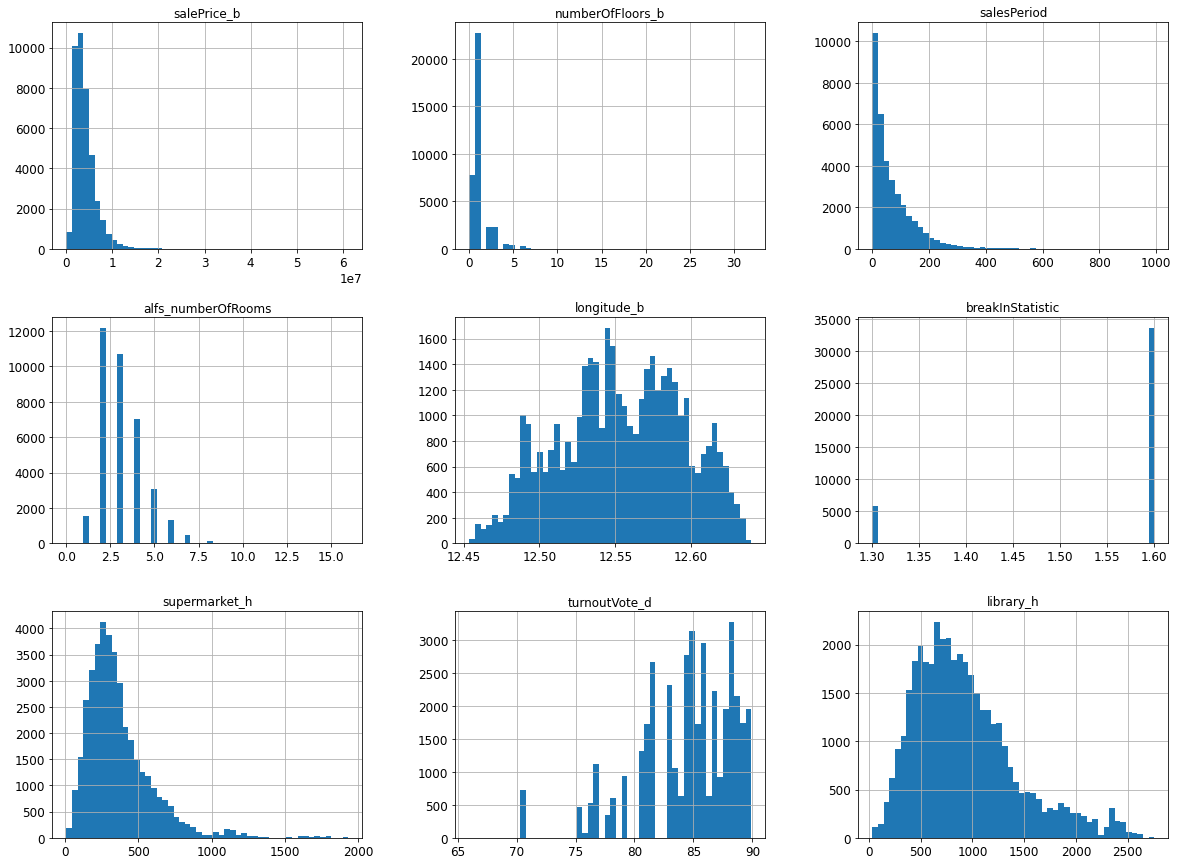

In [128]:
hist_prices = housing_data_pipe[["salePrice_b", "numberOfFloors_b", 'salesPeriod',
'alfs_numberOfRooms', 'longitude_b', 'breakInStatistic', 
                                'supermarket_h', 'turnoutVote_d', 'library_h']].hist(bins = 50, figsize=(20,15))

#plt.savefig('hist_random')


In [1139]:
cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector)
])
combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe),
])

housing_data_pre_pipe = combined_preprocessing.fit_transform(housing_data)

In [997]:
housing_data.shape

(39964, 219)

In [131]:
housing_with_idx = housing_data_pipe.reset_index()


housing_with_idx["city_b"].hist(figsize = [10, 7])
plt.xticks(rotation=30)
#plt.savefig("city_hist")

KeyError: 'city_b'

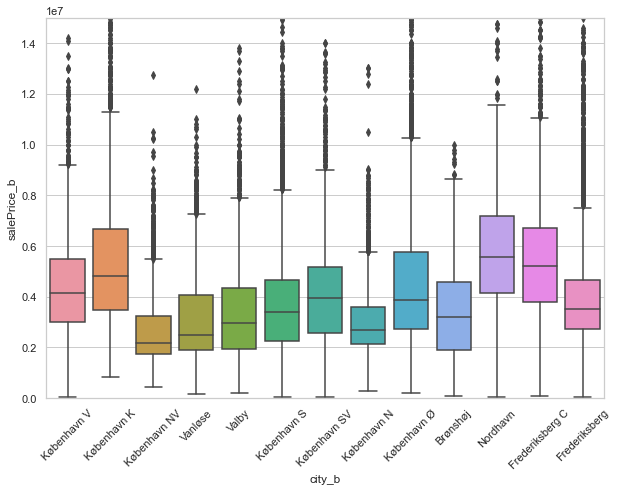

In [828]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (10,7))
plt.xticks(rotation=45)
plt.ylim([0,15000000])
hous_boxplot = sns.boxplot(x="city_b", y="salePrice_b", data=housing_with_idx)
plt.savefig("boxplot_city")

In [1140]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

housing_with_idx = housing_data.reset_index()

for train_index, test_index in split.split(housing_with_idx, housing_with_idx['city_b']):
        strat_train_set = housing_with_idx.loc[train_index]
        strat_test_set = housing_with_idx.loc[test_index]

In [1141]:
print("train set shape: ", strat_train_set.shape)
print("test set shape: ", strat_test_set.shape)

train set shape:  (31971, 220)
test set shape:  (7993, 220)


In [134]:
print(strat_test_set['city_b'].value_counts() / len(strat_test_set))
print(housing_with_idx['city_b'].value_counts() / len(housing_with_idx))

København S       0.23
København Ø       0.12
Frederiksberg     0.10
Valby             0.08
København K       0.07
København N       0.07
København SV      0.06
København V       0.06
Vanløse           0.05
København NV      0.05
Frederiksberg C   0.05
Brønshøj          0.05
Nordhavn          0.02
Name: city_b, dtype: float64
København S       0.23
København Ø       0.12
Frederiksberg     0.10
Valby             0.08
København K       0.07
København N       0.07
København SV      0.06
København V       0.06
Vanløse           0.05
København NV      0.05
Brønshøj          0.05
Frederiksberg C   0.05
Nordhavn          0.02
Name: city_b, dtype: float64


In [998]:
num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),   
        ('paymentAttributesAdder', num_paymentAttributesAdder)
    ]
)
housing_num = num_preprocessing_pipe.fit_transform(strat_train_set)

In [999]:
corr_matrix = housing_num.corr()
corr_matrix["salePrice_b"].sort_values(ascending=False)

salePrice_b                 1.00
paymentCash_b               0.95
AVM_pris_d                  0.93
areaResidential_b           0.83
alfs_area                   0.81
alfs_numberOfRooms          0.70
Antal værelser              0.66
propertyValuation_b         0.62
numberOfToilets_bd          0.52
numberOfBaths_bd            0.42
alfs_areaBasement           0.29
turnoutVote_d               0.24
numberOfFloors_b            0.18
library_h                   0.18
alfs_rebuildYear            0.18
roadtrain_h                 0.18
busstop_h                   0.17
soccerfield_h               0.17
junction_h                  0.17
doctor_h                    0.16
school_h                    0.14
daycare_h                   0.14
sportshall_h                0.13
supermarket_h               0.13
salesYear_b                 0.13
publicbath_h                0.12
priceIndex_s                0.12
salesPeriod                 0.12
hospital_h                  0.11
longitude_b                 0.11
priceChang

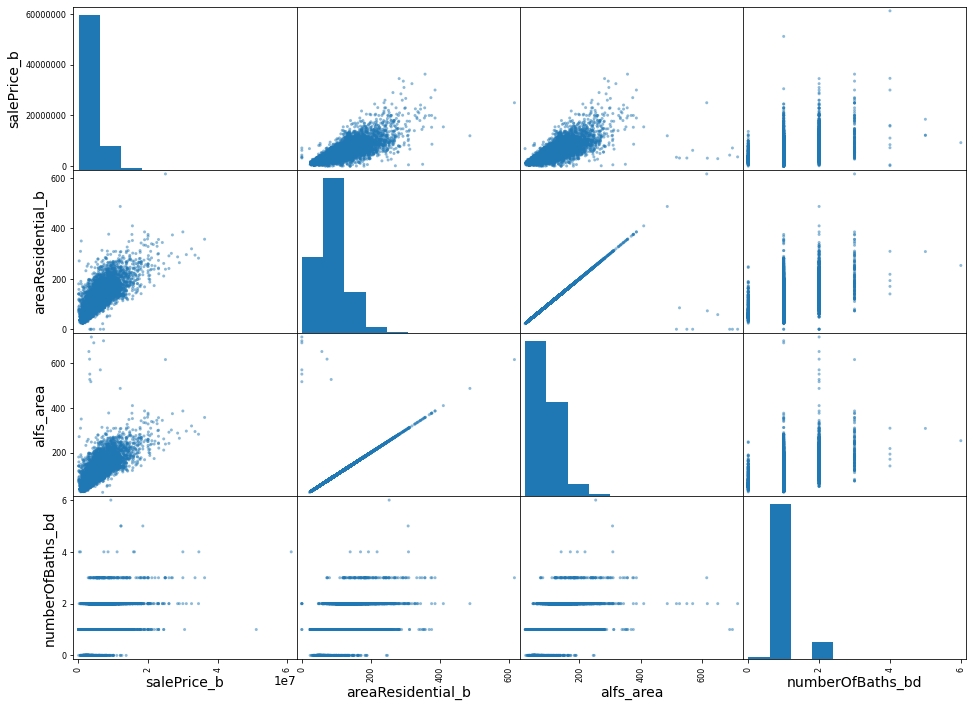

In [137]:
from pandas.plotting import scatter_matrix
 
attributes = ['salePrice_b', 'areaResidential_b', 
              'alfs_area', 'numberOfBaths_bd']
scatter_matrix(housing_num[attributes], figsize=(16, 12))
#plt.savefig("scatter_corr")

In [138]:
list(housing_num.columns) 

['alfs_areaWeighted',
 'buildYear_b',
 'radonRiskCategory_d',
 'salesYear_b',
 'Boligstørrelse',
 'alfs_area',
 'alfs_areaBasement',
 'Kælder',
 'Vægtet Areal',
 'alfs_numberOfRooms',
 'Antal værelser',
 'alfs_buildYear_d',
 'propertyCharges',
 'alfs_postal',
 'salesPeriod',
 'address.latestForSale.dateAnnounced',
 'address.latestForSale.dateAdded',
 'address.latestForSale.dateRemoved',
 'address.latestForSale.salesPeriodTotal',
 'areaResidential_b',
 'numberOfFloors_b',
 'floor_b',
 'alfs_rebuildYear',
 'Opførselsesår',
 'Antal Etager',
 'numberOfToilets_bd',
 'numberOfBaths_bd',
 'turnoutVote_d',
 'daycare_h',
 'doctor_h',
 'hospital_h',
 'junction_h',
 'metro_h',
 'school_h',
 'busstop_h',
 'strain_h',
 'supermarket_h',
 'train_h',
 'library_h',
 'pharmacy_h',
 'coast_h',
 'forest_h',
 'lake_h',
 'airport_h',
 'sportshall_h',
 'publicbath_h',
 'soccerfield_h',
 'roadtrain_h',
 'priceIndex_s',
 'priceChangeMPriorIndex_s',
 'priceChangeYPriorIndex_s',
 'latitude_b',
 'longitude_b',
 '

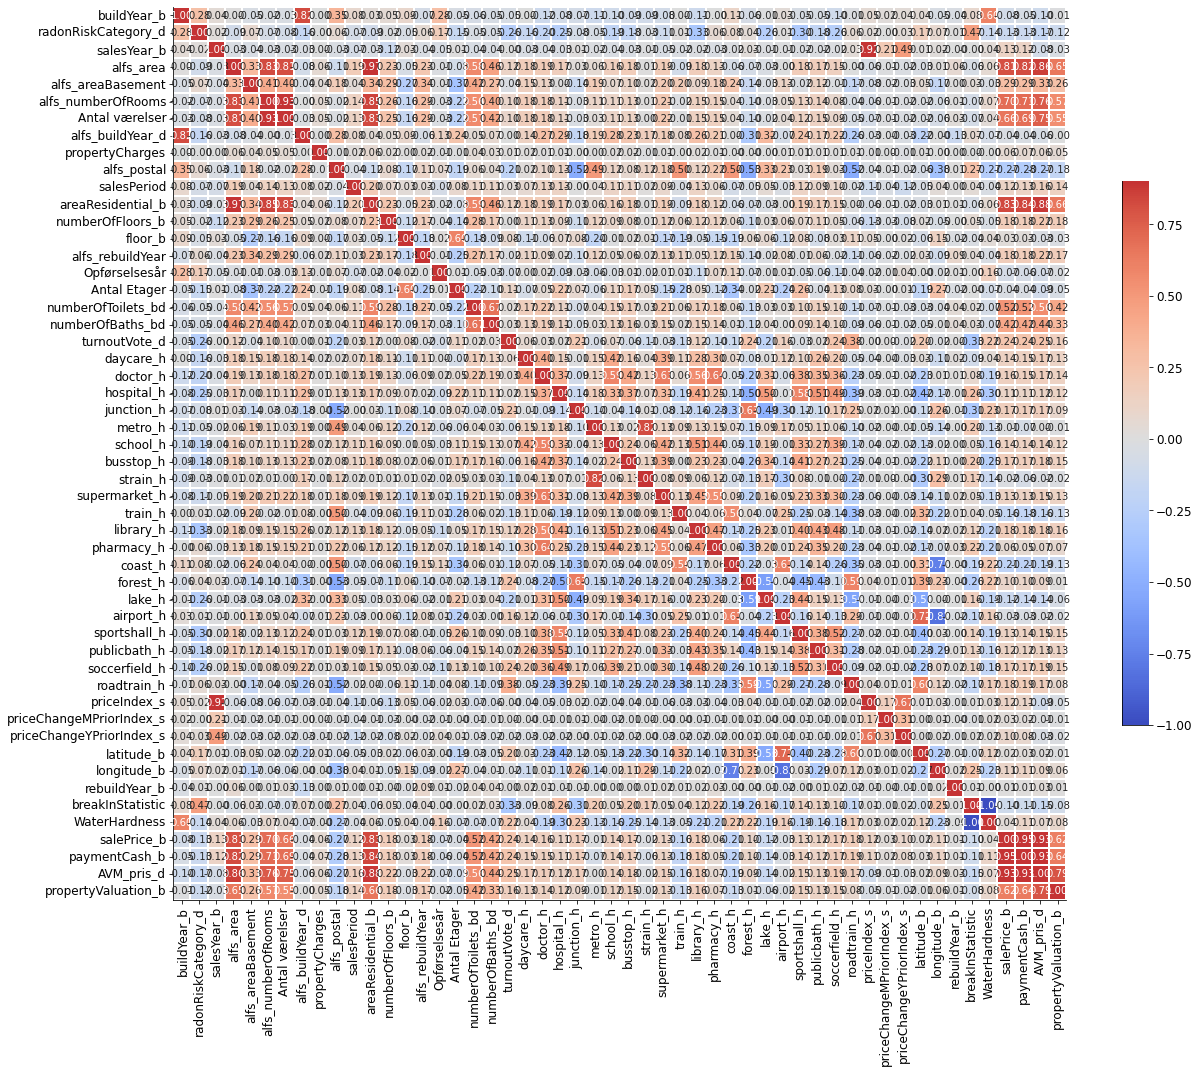

In [139]:
cm = housing_num.corr(method='pearson')
hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
hm.figure.set_size_inches(20,20)
#plt.savefig("corr_plot_appendix")


In [141]:

first_half_col = ['salePrice_b','paymentCash_b', 'AVM_pris_d', 'propertyValuation_b',
       'buildYear_b', 'salesYear_b', 'priceIndex_s',
       'priceChangeMPriorIndex_s', 'priceChangeYPriorIndex_s',
       'Boligstørrelse', 'Kælder', 'Vægtet Areal', 'Antal værelser',
       'salesPeriod', 'areaResidential_b',
       'numberOfFloors_b', 'floor_b', 'alfs_rebuildYear',
       'Opførselsesår', 'Antal Etager', 'numberOfToilets_bd',
       'numberOfBaths_bd', 'turnoutVote_d', 'daycare_h', 'doctor_h',
       'hospital_h', 'junction_h', 'metro_h', 'school_h', 'busstop_h',
       'strain_h', 'supermarket_h', 'train_h', 'library_h', 'pharmacy_h',
       'coast_h', 'forest_h', 'lake_h', 'airport_h', 'sportshall_h',
       'publicbath_h', 'soccerfield_h', 'roadtrain_h', 
        'unemploymentRateCPH_s', 'unemploymentRateDK_s', 'mortgageRate_s',
       'OMXC20_s', 'Bygning, Samlet areal', 'aboveSea_d']

In [142]:
housing_num.columns

Index(['alfs_areaWeighted', 'buildYear_b', 'radonRiskCategory_d',
       'salesYear_b', 'Boligstørrelse', 'alfs_area', 'alfs_areaBasement',
       'Kælder', 'Vægtet Areal', 'alfs_numberOfRooms', 'Antal værelser',
       'alfs_buildYear_d', 'propertyCharges', 'alfs_postal', 'salesPeriod',
       'address.latestForSale.dateAnnounced',
       'address.latestForSale.dateAdded', 'address.latestForSale.dateRemoved',
       'address.latestForSale.salesPeriodTotal', 'areaResidential_b',
       'numberOfFloors_b', 'floor_b', 'alfs_rebuildYear', 'Opførselsesår',
       'Antal Etager', 'numberOfToilets_bd', 'numberOfBaths_bd',
       'turnoutVote_d', 'daycare_h', 'doctor_h', 'hospital_h', 'junction_h',
       'metro_h', 'school_h', 'busstop_h', 'strain_h', 'supermarket_h',
       'train_h', 'library_h', 'pharmacy_h', 'coast_h', 'forest_h', 'lake_h',
       'airport_h', 'sportshall_h', 'publicbath_h', 'soccerfield_h',
       'roadtrain_h', 'priceIndex_s', 'priceChangeMPriorIndex_s',
       'priceC

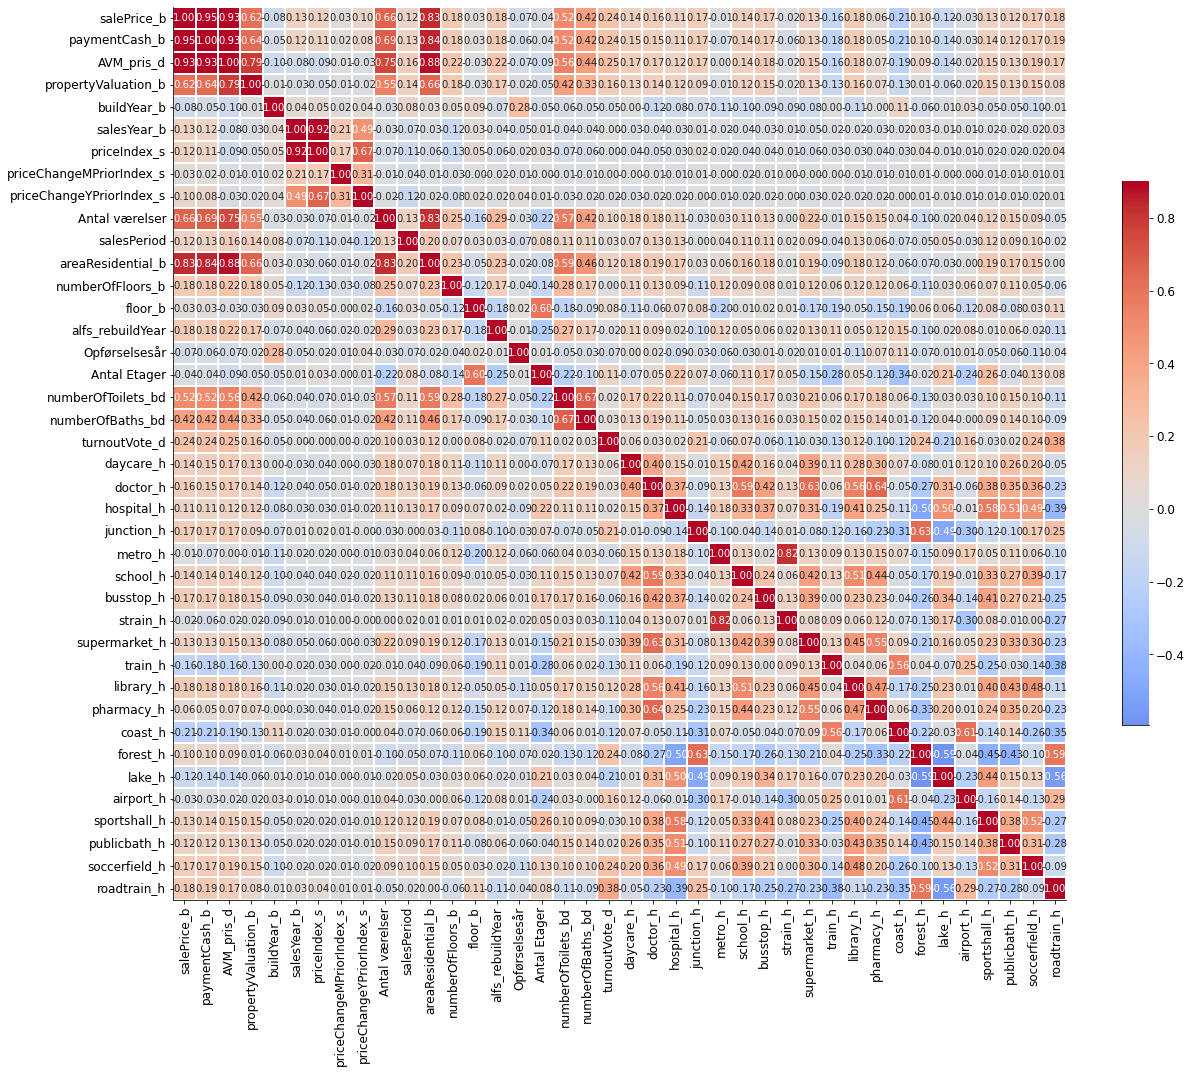

In [144]:

cm = housing_num[first_half_col].corr(method='pearson')
hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
hm.figure.set_size_inches(20,20)
plt.savefig("corr_plot_selected")


In [1000]:
num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder)    
    ]
)

housing_num = num_preprocessing_pipe.fit_transform(strat_train_set)

In [146]:
housing_num.shape

(31971, 56)

In [ ]:
corr_matrix = housing_num.corr()
corr_matrix["salePrice_b"].sort_values(ascending=False)

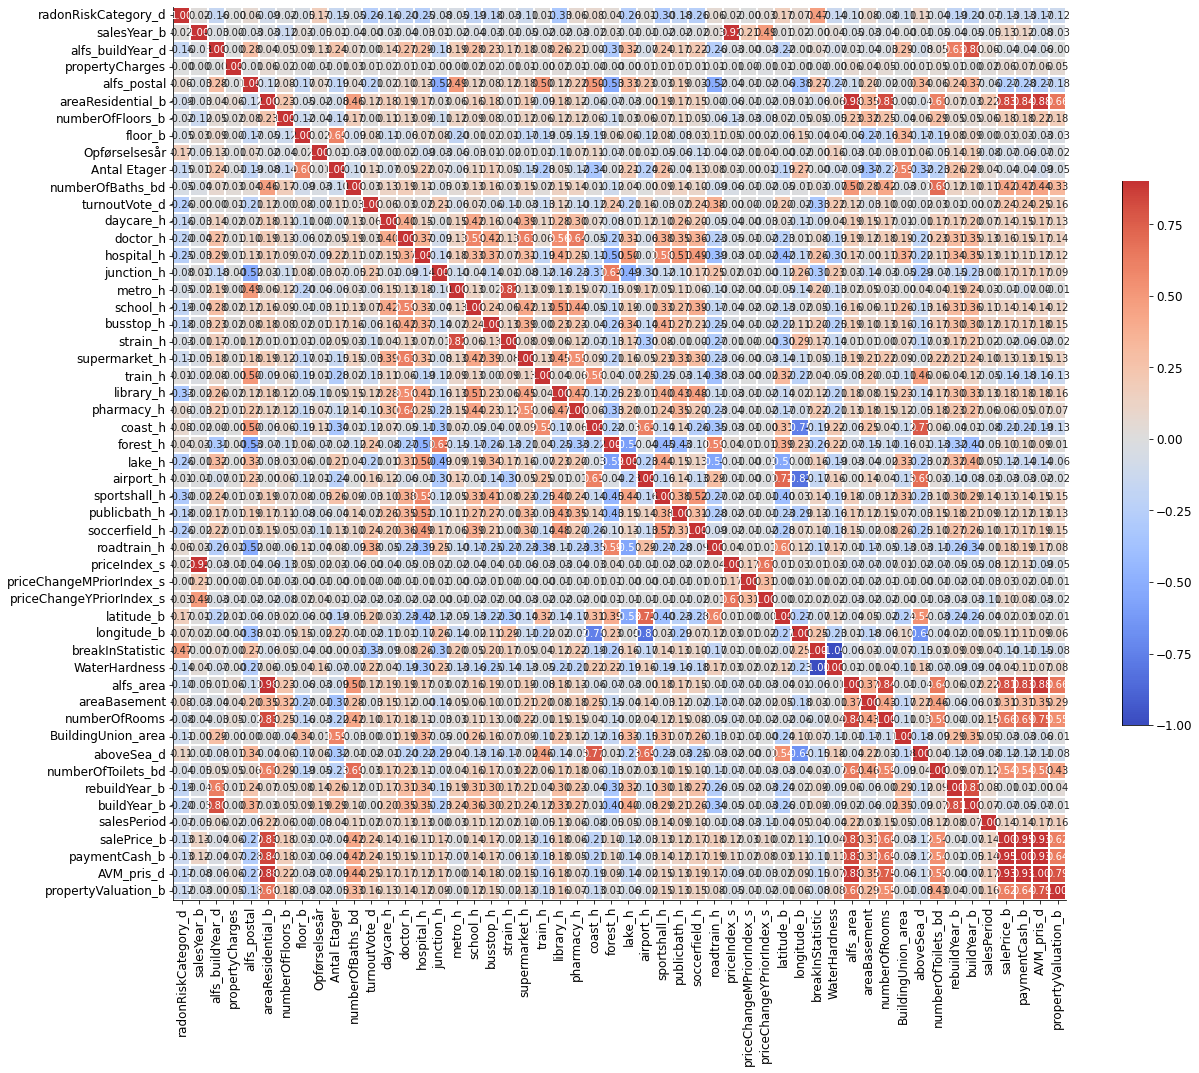

In [148]:
cm = housing_num.corr(method='pearson')
hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
hm.figure.set_size_inches(20,20)
#plt.savefig("corr_plot_appendix")


In [1142]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'postalId_b']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


In [1143]:
drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)

num_paymentAttributesAdder = paymentAttributesAdder(variables = ["salePrice_b"])


num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot

cat_feature_selector = FeatureSelector(variables = updated_cat_feat)


In [1144]:
onehot_housing_2 = ['electionArea_d', 'city_b', 'usage_d', 'outerwall_d', 'roof_d', 
                    'heating_d', 'biggestParty_d', 'kitchen.content_d', "itemTypeName_b"]

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)


In [1145]:
num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        #('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    ('itemAttributesAdder', cat_itemAttributesAdder),
    #("postalAttributesAdder", cat_postalAttributesAdder),
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

Make_dataframe = MakeToDataFrame(list(num_preprocessing_pipe.fit_transform(strat_train_set).columns) +
                                 list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns))

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])




housing_data_pre_pipe3 = num_preprocessing_pipe.fit_transform(strat_train_set)
housing_data_pre_pipe4 = cat_preprocessing_pipe.fit_transform(strat_train_set)

housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)



In [1146]:
housing_data_pre_pipe.shape 
## Before outlier removed

(27964, 169)

### These are the variables we are using so far

In [982]:
print(housing_data_pre_pipe3.columns)
print(updated_cat_feat)

#Index(['salePrice_b', 'Antal Etager', 'BuildingUnion_area', 'OMXC20_s',
#       'Opførselsesår', 'WaterHardness', 'aboveSea_d', 'airport_h',
#       'alfs_area', 'alfs_areaWeighted', 'alfs_buildYear_d', 'alfs_postal',
#       'areaBasement', 'areaResidential_b', 'breakInStatistic', 'busstop_h',
#       'coast_h', 'daycare_h', 'doctor_h', 'floor_b', 'forest_h', 'hospital_h',
#       'junction_h', 'lake_h', 'latitude_b', 'library_h', 'longitude_b',
#       'metro_h', 'mortgageRate_s', 'numberOfBaths_bd', 'numberOfFloors_b',
#       'numberOfRooms', 'numberOfToilets_bd', 'pharmacy_h',
#       'priceChangeMPriorIndex_s', 'priceChangeYPriorIndex_s', 'priceIndex_s',
#       'propertyCharges', 'publicbath_h', 'radonRiskCategory_d',
#       'rebuildYear_b', 'roadtrain_h', 'salesPeriod', 'salesYear_b',
#       'school_h', 'soccerfield_h', 'sportshall_h', 'strain_h',
#       'supermarket_h', 'train_h', 'turnoutVote_d', 'unemploymentRateCPH_s',
#       'unemploymentRateDK_s'],
#      dtype='object')
#{'usage_d', 'heating_d', 'itemtypeName', 'biggestParty_d', 'electionArea_d', 'radonRisk_d', 
#'quarter_b', 'roof_d', 'energyMark_b', 'floodingRisk_d', 'quarter0_b', 'kitchen.content_d', 
#'itemTypeName_b', 'noise_d', 'city_b', 'outerwall_d'}

Index(['salePrice_b', 'alfs_postal', 'soccerfield_h', 'numberOfBaths_bd',
       'longitude_b', 'breakInStatistic', 'propertyCharges',
       'unemploymentRateCPH_s', 'priceIndex_s', 'forest_h', 'numberOfFloors_b',
       'metro_h', 'publicbath_h', 'sportshall_h', 'Opførselsesår', 'train_h',
       'mortgageRate_s', 'busstop_h', 'OMXC20_s', 'school_h', 'supermarket_h',
       'coast_h', 'pharmacy_h', 'floor_b', 'junction_h', 'roadtrain_h',
       'hospital_h', 'WaterHardness', 'daycare_h', 'turnoutVote_d',
       'salesYear_b', 'airport_h', 'areaResidential_b', 'latitude_b', 'lake_h',
       'Antal Etager', 'doctor_h', 'library_h', 'radonRiskCategory_d',
       'priceChangeMPriorIndex_s', 'alfs_buildYear_d', 'unemploymentRateDK_s',
       'strain_h', 'priceChangeYPriorIndex_s', 'alfs_area', 'areaBasement',
       'numberOfRooms', 'BuildingUnion_area', 'aboveSea_d',
       'numberOfToilets_bd', 'rebuildYear_b', 'buildYear_b', 'salesPeriod'],
      dtype='object')
{'heating_d', 'noise_d'

In [1006]:
Find_salePrice = 0 #It is the first because of how custom std scaler works
pre_housing_label = housing_data_pre_pipe[:,Find_salePrice]
pre_housing_sample = np.delete(housing_data_pre_pipe, obj = Find_salePrice , axis = 1)




In [1013]:
from sklearn.linear_model import LinearRegression 
reg_data = complete_pipeline.transform(strat_train_set)

pre_y = reg_data[:,Find_salePrice].astype(float)
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)



lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

LinearRegression()

In [1014]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [1015]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Predictions:", lin_reg.predict(pre_X))
print("Label-values:", pre_y)
print("Linear rmse:", lin_rmse)
print("Absolute loss:", mean_absolute_error(pre_y, housing_predictions))
print("Relative loss:", mean_absolute_percentage_error(pre_y, lin_reg.predict(pre_X)))

Predictions: [2035761.67275293 3648460.89464733 5739753.65779649 ... 5703375.02211101
 1070259.4885748  5894080.50274854]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Linear rmse: 984235.0726956355
Absolute loss: 576123.2988657163
Relative loss: 0.19909911867640087


In [1016]:
lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.03077729e+06 8.98474781e+05 9.25572099e+05 3.37688757e+10
 7.01393020e+07 1.01444587e+06 1.06074583e+06 1.08301184e+06
 9.68537041e+05 9.63272060e+05]
Mean: 3384695983.543178
Standard deviation: 10128080885.54747


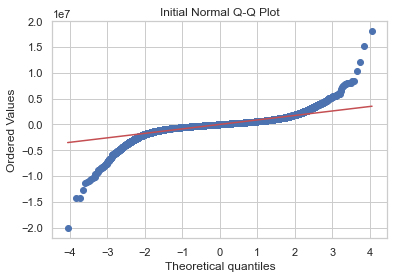

In [1011]:
from scipy import stats
from scipy.stats import norm
sns.set_theme(style="whitegrid")
residuals1 = lin_reg.predict(pre_X) - pre_y

stats.probplot(residuals1, dist=norm, plot=plt, fit=True)
#ax.get_lines()[0].set_markerfacecolor('limegreen')
#ax.get_lines()[0].set_markeredgecolor('limegreen')
plt.title("Initial Normal Q-Q Plot")
plt.savefig("QQplot1")

In [1017]:
pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)



lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))
print("Relative loss:", mean_absolute_percentage_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))

housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Predictions: [2347755.80182654 3350671.45231473 5266008.00683267 ... 5339260.74303149
 1578795.64405541 5089902.97313741]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 618888.1061476873
Relative loss: 0.18666590296306299
Linear rmse: 0.22845696663361162
Scores: [2.25370800e-01 2.29560180e-01 2.08154406e-01 2.80292810e+04
 7.82391140e+01 2.15976968e-01 2.49416387e-01 2.47942434e-01
 2.07943437e-01 2.39204595e-01]
Mean: 2810.9343700034733
Standard deviation: 8406.147725170425


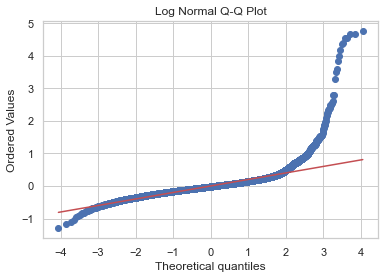

In [889]:
from scipy import stats
from scipy.stats import norm
residuals1 = lin_reg.predict(pre_X) - pre_y

stats.probplot(residuals1, dist=norm, plot=plt, fit=True)
#ax.get_lines()[0].set_markerfacecolor('limegreen')
#ax.get_lines()[0].set_markeredgecolor('limegreen')
plt.title("Log Normal Q-Q Plot")
plt.savefig("QQplot2")

## Removing outliers

In [1147]:
outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)
#num_outlier_remover = OutlierRemover(variables = outlier_vars)


num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)


combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

Make_dataframe = MakeToDataFrame(list(num_preprocessing_pipe.fit_transform(strat_train_set).columns) +
                                 list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns))

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])



housing_data_pre_pipe3 = num_preprocessing_pipe.fit_transform(strat_train_set)
housing_data_pre_pipe4 = cat_preprocessing_pipe.fit_transform(strat_train_set)

housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)



In [1019]:
housing_data_pre_pipe.shape
## After outlier removed

(25605, 169)

In [1020]:
reg_data = complete_pipeline.transform(strat_train_set)
pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))
print("Relative loss:", mean_absolute_percentage_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))


housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Predictions: [2327756.25168876 3342726.46523243 5475061.99603626 ... 5406580.25709577
 1641551.88604504 5044819.60055684]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 505037.10445962544
Relative loss: 0.1180430196555969
Linear rmse: 0.1534619417332969
Scores: [1.52783298e-01 1.55221801e-01 1.49572269e-01 1.91193767e+03
 3.81703041e+04 1.58244669e-01 1.55809851e-01 1.50379262e-01
 1.59120553e-01 1.48725425e-01]
Mean: 4008.3471616681563
Standard deviation: 11401.575112302024


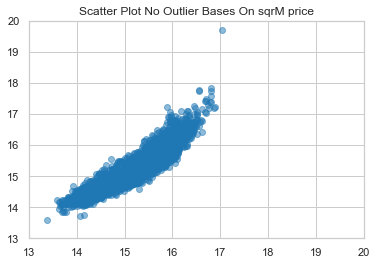

In [897]:
plt.scatter(pre_y, housing_predictions , alpha=0.5, c = "tab:blue", )
plt.title("Scatter Plot No Outlier Bases On sqrM price")
plt.xlim([13, 20])
plt.ylim([13, 20])
plt.savefig("Scatter_outlier1")

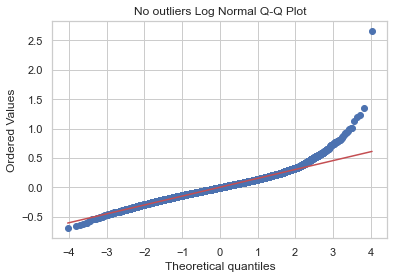

In [898]:
residuals1 = lin_reg.predict(pre_X) - pre_y

stats.probplot(residuals1, dist=norm, plot=plt, fit=True)
#ax.get_lines()[0].set_markerfacecolor('limegreen')
#ax.get_lines()[0].set_markeredgecolor('limegreen')
plt.title("No outliers Log Normal Q-Q Plot")
plt.savefig("QQplot3")

In [ ]:
## Before outlier correction
Predictions: [2328530.35789185 3344833.34945934 5225602.21346991 ... 5275605.62625714
 1578059.34792433 4988756.05256475]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 509060.92319793766
Relative loss: 0.1813152144159166
Linear rmse: 0.22268898143759228
Scores: [2.20346630e-01 2.24465226e-01 2.04381493e-01 1.25988117e+04
 1.59647065e+04 2.05638762e-01 2.45859909e-01 2.44693011e-01
 1.99948626e-01 2.34433454e-01]
Mean: 2856.5298019272846
Standard deviation: 5761.981313965916

In [1021]:
print('Weight Coefficients : '+ str(lin_reg.coef_))
print('\nY-Axis Intercept : '+ str(lin_reg.intercept_))

Weight Coefficients : [ 1.06869395e-02 -3.51815181e-03 -1.57117713e-03 -7.96734122e-02
 -4.21573922e-02 -3.50707936e-04 -1.24128294e-02  7.74174169e-02
  3.30235627e-02  2.53712520e-04 -1.08987785e-01  1.26546713e-03
  5.82018620e-03 -4.91543911e-03  4.37204062e-03 -1.37192674e-03
  3.48829979e-02 -5.74817056e-03  8.10292052e-03  1.98491467e-04
 -1.14160812e-01 -8.21470008e-03  3.87530149e-02  1.17683100e-02
  2.55176431e-02  4.04563242e-02  3.28913563e-02  1.92051844e-03
  2.09350611e-02  9.29703267e-04  7.28166404e-03  1.24132863e-01
 -4.64354115e-02 -4.69420041e-02 -9.22306341e-03 -2.72120018e-03
 -6.22480436e-03 -2.63935001e-03 -1.13281868e-04  3.04929912e-03
  1.91864215e-02  3.58162492e-02  8.51803950e-03  1.91922690e-01
  9.75784565e-03  8.77480993e-02 -1.31702787e-02  2.31101492e-02
 -2.56387753e-02  1.05792841e-03 -4.72733975e-03 -2.33137194e-02
  5.06284854e-03  5.39844162e-03 -2.66756716e-02 -2.41880533e-02
 -2.52768809e-03 -3.19854324e-02  3.76007949e-02 -3.78232034e-02
  9

In [1022]:
attributes = list(housing_data_pre_pipe3.columns[1:]) + list(housing_data_pre_pipe4.columns)
sorted(zip(lin_reg.coef_, attributes), reverse=True)

[(0.1919226904596214, 'alfs_area'),
 (0.12413286308062979, 'areaResidential_b'),
 (0.08774809928607105, 'numberOfRooms'),
 (0.07741741693841017, 'priceIndex_s'),
 (0.06256937161787268, 'itemTypeName_b'),
 (0.06173166053544115, 'energyMark_b'),
 (0.0570889714852652, 'radonRisk_d'),
 (0.04045632424912698, 'hospital_h'),
 (0.03875301489459092, 'floor_b'),
 (0.0376007949474522, 'quarter_b'),
 (0.035816249188843845, 'strain_h'),
 (0.034882997940182715, 'busstop_h'),
 (0.03302356274497224, 'forest_h'),
 (0.03289135633180455, 'WaterHardness'),
 (0.030825154677124184, 'roof_d'),
 (0.02970158098938794, 'quarter0_b'),
 (0.025517643076101083, 'roadtrain_h'),
 (0.02311014915874012, 'aboveSea_d'),
 (0.020935061130856775, 'turnoutVote_d'),
 (0.01918642152466824, 'unemploymentRateDK_s'),
 (0.011768309963643343, 'junction_h'),
 (0.010686939538974809, 'alfs_postal'),
 (0.009757845645478259, 'areaBasement'),
 (0.009528141577476293, 'usage_d'),
 (0.00851803950489882, 'priceChangeYPriorIndex_s'),
 (0.0081

### With all feature engineering except imputing done.

In [1148]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'alfs_postal']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)

outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)

drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)

onehot_housing_2 = ['postalId_b', 'electionArea_d', 'city_b', 'usage_d', 'outerwall_d', 'roof_d', 
                    'heating_d', 'biggestParty_d', 'kitchen.content_d', "itemTypeName_b"]

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)

In [1149]:
num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    ('itemAttributesAdder', cat_itemAttributesAdder),    
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder)#,
    #("cat_most_frequent_imputer", cat_most_frequent_imputer)
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])


housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)


In [1025]:
housing_data_pre_pipe.shape

(25605, 184)

In [1026]:
reg_data = complete_pipeline.transform(strat_train_set)

pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)


print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))
print("Relative loss:", mean_absolute_percentage_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))


housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Predictions: [2334225.66350972 3332139.48941034 5253450.27124264 ... 5492260.44135421
 1649202.51236095 4951084.19281389]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 505994.1485244693
Relative loss: 0.11805061856706935
Linear rmse: 0.15398905018747808
Scores: [1.53463662e-01 1.55806381e-01 1.49711647e-01 1.63000382e-01
 2.62816200e+04 1.59362246e-01 1.56151951e-01 1.50868552e-01
 1.60459844e-01 1.49111722e-01]
Mean: 2628.301789730135
Standard deviation: 7884.439390395725


In [1027]:
print(pre_X.shape)
attributes = list(num_features_col[1:] + cat_features_col)
sorted(zip(np.abs(lin_reg.coef_), attributes), reverse=True)

(25605, 183)


[(0.19334039082140642, 'alfs_area'),
 (0.1242582766635121, 'areaResidential_b'),
 (0.12082531543835491, 'metro_h'),
 (0.11675198195045536, 'coast_h'),
 (0.09469982671881647, 'electionArea_d'),
 (0.08964013489019518, 'numberOfRooms'),
 (0.0805983810592971, 'roof_d'),
 (0.07726660837632471, 'priceIndex_s'),
 (0.07015618596041218, 'usage_d'),
 (0.06826040466010155, 'city_b'),
 (0.062289783201743595, 'longitude_b'),
 (0.06207290895419575, 'outerwall_d'),
 (0.06024473956261856, 'quarter_b'),
 (0.0594808854574803, 'postalId_b'),
 (0.04780582694100517, 'lake_h'),
 (0.046413109380857666, 'radonRisk_d'),
 (0.04513383103554285, 'latitude_b'),
 (0.04310186945354827, 'quarter0_b'),
 (0.04305848849804724, 'floodingRisk_d'),
 (0.03947118712378833, 'hospital_h'),
 (0.03908019460456534, 'floor_b'),
 (0.03600363516499485, 'airport_h'),
 (0.03283788633574023, 'busstop_h'),
 (0.032377648298454076, 'itemTypeName_b'),
 (0.03108287643964995, 'heating_d'),
 (0.029733522807364687, 'forest_h'),
 (0.02967191489

## Imputing:

In [1150]:
outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)

num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    ('itemAttributesAdder', cat_itemAttributesAdder),    
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    ("cat_most_frequent_imputer", cat_most_frequent_imputer)
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])

#for_corr_plor = num_preprocessing_pipe.fit_transform(strat_train_set)
housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)

In [1034]:
housing_data_pre_pipe.shape

(25605, 184)

In [1035]:
reg_data = complete_pipeline.transform(strat_train_set)

pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))
print("Relative loss:", mean_absolute_percentage_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))


housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Predictions: [2334225.66350972 3332139.48941034 5253450.27124264 ... 5492260.44135421
 1649202.51236095 4951084.19281389]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 505994.1485244693
Relative loss: 0.11805061856706935
Linear rmse: 0.15398905018747808
Scores: [1.53463662e-01 1.55806381e-01 1.49711647e-01 1.63000382e-01
 2.62816200e+04 1.59362246e-01 1.56151951e-01 1.50868552e-01
 1.60459844e-01 1.49111722e-01]
Mean: 2628.301789730135
Standard deviation: 7884.439390395725


In [1036]:
attributes = list(num_features_col[1:] + cat_features_col)
sorted(zip(np.abs(lin_reg.coef_), attributes), reverse=True)

[(0.19334039082140642, 'alfs_area'),
 (0.1242582766635121, 'areaResidential_b'),
 (0.12082531543835491, 'metro_h'),
 (0.11675198195045536, 'coast_h'),
 (0.09469982671881647, 'quarter_b'),
 (0.08964013489019518, 'numberOfRooms'),
 (0.0805983810592971, 'energyMark_b'),
 (0.07726660837632471, 'priceIndex_s'),
 (0.07015618596041218, 'radonRisk_d'),
 (0.06826040466010155, 'city_b'),
 (0.062289783201743595, 'longitude_b'),
 (0.06207290895419575, 'floodingRisk_d'),
 (0.06024473956261856, 'usage_d'),
 (0.0594808854574803, 'biggestParty_d'),
 (0.04780582694100517, 'lake_h'),
 (0.046413109380857666, 'quarter0_b'),
 (0.04513383103554285, 'latitude_b'),
 (0.04310186945354827, 'outerwall_d'),
 (0.04305848849804724, 'electionArea_d'),
 (0.03947118712378833, 'hospital_h'),
 (0.03908019460456534, 'floor_b'),
 (0.03600363516499485, 'airport_h'),
 (0.03283788633574023, 'busstop_h'),
 (0.032377648298454076, 'roof_d'),
 (0.03108287643964995, 'heating_d'),
 (0.029733522807364687, 'forest_h'),
 (0.029671914

### Remove werid features

In [1151]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'alfs_postal',
                    'longitude_b', 'latitude_b', 'Antal Etager', #What we remove this round
                     'WaterHardness', 'quarter0_b', 'city_b', 'Opførselsesår', "itemTypeName_b", 'itemtypeName', 
                     "Bygning, Samlet areal", 'areaResidential_b']
                      #, 'unemploymentRateCPH_s', 'priceChangeYPriorIndex_s']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)

num_interiorAttributesAdder = interiorAttributesAdder2(variables = inter_vars2)

num_paymentAttributesAdder = paymentAttributesAdder(variables = ["salePrice_b"])

outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)


onehot_housing_2 = ['postalId_b', 'electionArea_d', 'usage_d', 'outerwall_d', 'roof_d', 
                    'heating_d', 'biggestParty_d', 'kitchen.content_d']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)


ord_housing_2 = ['noise_d', 'energyMark_b', 
                'radonRisk_d', 'floodingRisk_d',
                'quarter_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing_2)




num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    #('itemAttributesAdder', cat_itemAttributesAdder),   #Removed  
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    ("cat_most_frequent_imputer", cat_most_frequent_imputer)
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])

for_corr_plor = num_preprocessing_pipe.fit_transform(strat_train_set)
housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)

print(housing_data_pre_pipe.shape)


reg_data = complete_pipeline.transform(strat_train_set)

pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))
print("Relative loss:", mean_absolute_percentage_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))


housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

(25615, 162)
Predictions: [2328241.72377673 3317774.18932888 5284887.36206096 ... 5432395.34395913
 1657123.50624612 4862878.06438255]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 511145.3568182345
Relative loss: 0.11904790626779596
Linear rmse: 0.15546032711916805
Scores: [0.15482473 0.15765973 0.15116406 0.16426202 0.15701155 0.16181914
 0.15747448 0.15259722 0.16015917 0.15050916]
Mean: 0.15674812796533705
Standard deviation: 0.004315935984023754


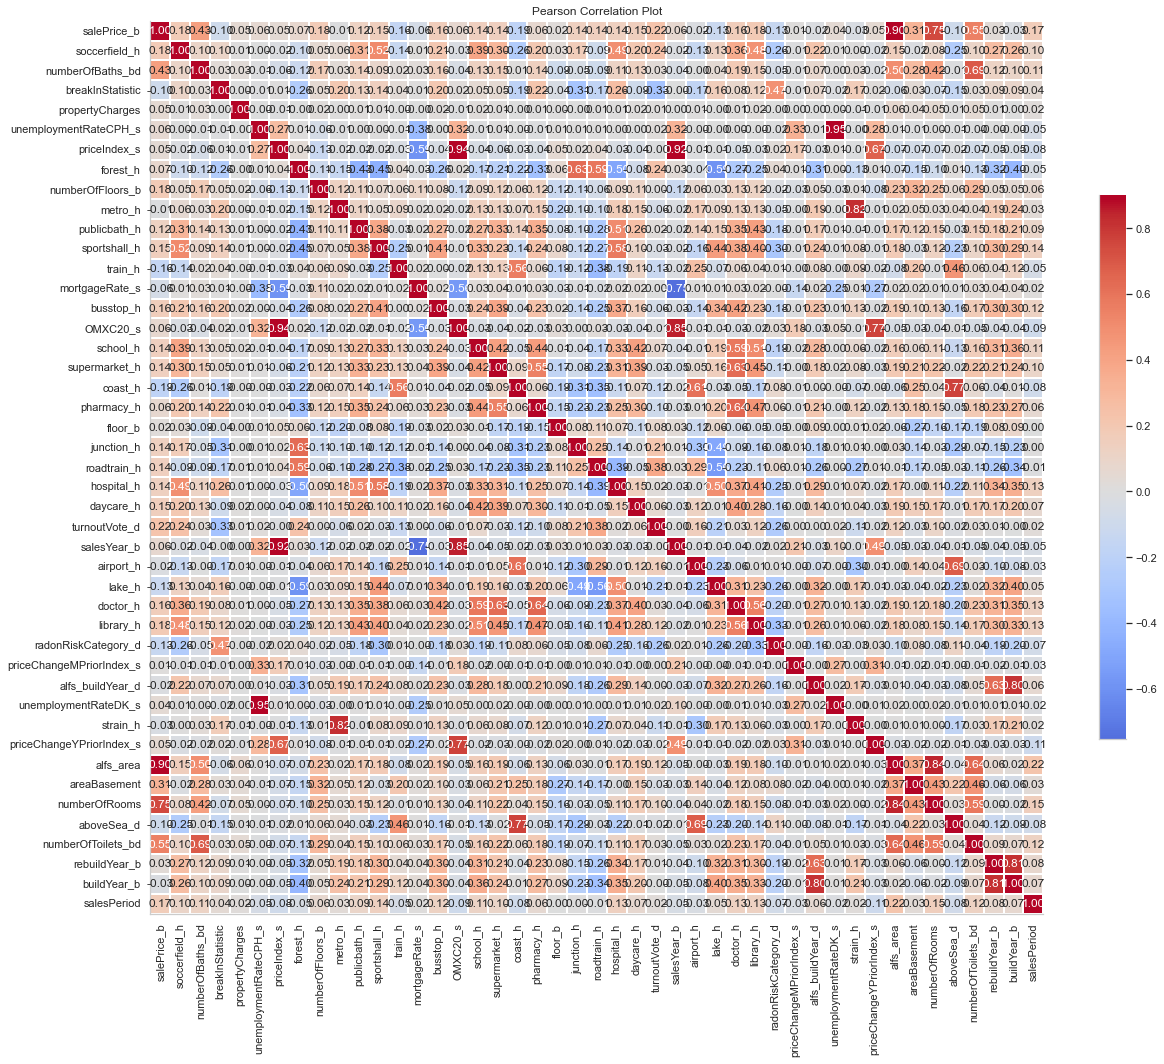

In [1043]:
cm = for_corr_plor.corr(method='pearson')
hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
hm.figure.set_size_inches(20,20)
plt.title("Pearson Correlation Plot")
plt.savefig("corr_pearson_plot")

### Removing Corr features

In [1152]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'alfs_postal',
                     'priceChangeYPriorIndex_s', 'longitude_b', 'latitude_b', 'Antal Etager', #What we remove this round
                     'WaterHardness', 'quarter0_b', 'city_b', 'Opførselsesår', "itemTypeName_b", 'itemtypeName', 
                     "Bygning, Samlet areal", 'areaResidential_b',
                     'unemploymentRateDK_s', 'priceChangeYPriorIndex_s', 'alfs_buildYear_d']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)

num_interiorAttributesAdder = interiorAttributesAdder2(variables = inter_vars2)

num_paymentAttributesAdder = paymentAttributesAdder(variables = ["salePrice_b"])

outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)


onehot_housing_2 = ['postalId_b', 'electionArea_d', 'usage_d', 'outerwall_d', 'roof_d', 
                    'heating_d', 'biggestParty_d', 'kitchen.content_d']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)


ord_housing_2 = ['noise_d', 'energyMark_b', 
                'radonRisk_d', 'floodingRisk_d',
                'quarter_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing_2)


In [1153]:
num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    #('itemAttributesAdder', cat_itemAttributesAdder),   #Removed  
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    ("cat_most_frequent_imputer", cat_most_frequent_imputer)
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])

for_corr_plor = num_preprocessing_pipe.fit_transform(strat_train_set)
housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)

print(housing_data_pre_pipe.shape)

for_feature_names = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom)
    
])
feature_pipe = for_feature_names.fit_transform(strat_train_set)
all_col_ = list(feature_pipe.columns) #Remove the last 'to_make_array' and this runs

reg_data = complete_pipeline.transform(strat_train_set)

pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))
print("Relative loss:", mean_absolute_percentage_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))


housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

(25615, 159)
Predictions: [2327576.00557519 3307215.32853716 5286451.51338293 ... 5471685.76930065
 1652470.76240947 4897799.49760811]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 511208.406200763
Relative loss: 0.1190804363510974
Linear rmse: 0.15550996039259038
Scores: [0.15491297 0.15770854 0.15117573 0.16431661 0.15712248 0.16183987
 0.15744114 0.15249833 0.16019486 0.15047506]
Mean: 0.15676855923059113
Standard deviation: 0.00434117365531103


In [1058]:
attributes = list(num_features_col[1:] + cat_features_col)
sorted(zip(np.abs(lin_reg.coef_), attributes), reverse=True)

[(0.319306764707629, 'alfs_area'),
 (0.15947349340276434, 'roof_d'),
 (0.15239065232299218, 'kitchen.content_d'),
 (0.11521585642239385, 'usage_d'),
 (0.10720302763639114, 'coast_h'),
 (0.1026066851831738, 'metro_h'),
 (0.09319793754989178, 'numberOfRooms'),
 (0.07768118788103168, 'priceIndex_s'),
 (0.06436828862399158, 'floodingRisk_d'),
 (0.05383380236838975, 'electionArea_d'),
 (0.050784648660749755, 'lake_h'),
 (0.04138378152631726, 'postalId_b'),
 (0.040951009834276374, 'heating_d'),
 (0.035255248039075246, 'hospital_h'),
 (0.03495644031460278, 'turnoutVote_d'),
 (0.034544040891045, 'floor_b'),
 (0.03342980686257527, 'busstop_h'),
 (0.03264092736794751, 'airport_h'),
 (0.031639526700292825, 'salesYear_b'),
 (0.031595178346673504, 'quarter_b'),
 (0.029413258056344295, 'breakInStatistic'),
 (0.02599014373550716, 'outerwall_d'),
 (0.024494510820004103, 'numberOfToilets_bd'),
 (0.022614806898177478, 'aboveSea_d'),
 (0.021858658076729282, 'salesPeriod'),
 (0.019811515398279883, 'strain

## Grid search to tune optimal features selection:

In [1047]:
# compare different numbers of features selected using mutual information
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV

In [1048]:
#complete_pipeline = Pipeline([
#    ('numericals', num_preprocessing_pipe),
#    ('complete_drop_nans', complete_drop_nans)
#])
#
#num_complete = complete_pipeline.fit_transform(strat_train_set)

In [1049]:
#reg_data = complete_pipeline.transform(strat_train_set)#

#pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
#pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)


#lin_reg.fit(pre_X, pre_y)

In [1059]:
from functools import partial
lin_reg = LinearRegression()

discrete_feat_idx = [i for i in range(len(num_features_col[1:]), pre_X.shape[1])]
sel_best_mir = SelectKBest(score_func = partial(mutual_info_regression, 
                                                discrete_features = discrete_feat_idx), 
                           k = 'all')

sel_best_mir.fit(pre_X, pre_y)

print(len(sel_best_mir.scores_), len(all_col_[1:]))
MI_best_score = zip(sel_best_mir.scores_, all_col_[1:])
sorted(MI_best_score, reverse = True)
                    
#sorted(zip(np.abs(lin_reg.coef_), attributes), reverse=True)

158 158


[(0.8723825653472872, 'alfs_area'),
 (0.5004312600677339, 'numberOfRooms'),
 (0.4733986103057344, 'propertyCharges'),
 (0.27212163618342444, 'buildYear_b'),
 (0.25313892634841917, 'rebuildYear_b'),
 (0.22332979958629373, 'turnoutVote_d'),
 (0.20265356221384412, 'airport_h'),
 (0.15207249508844978, 'coast_h'),
 (0.1474740524425855, 'numberOfToilets_bd'),
 (0.13725388243261172, 'roadtrain_h'),
 (0.13705087508859126, 'train_h'),
 (0.1184518026097443, 'lake_h'),
 (0.1089363462902897, 'hospital_h'),
 (0.10770014205166412, 'forest_h'),
 (0.10382901016840229, 'strain_h'),
 (0.09958061585471878, 'sportshall_h'),
 (0.0953530410222383, 'energyMark_b'),
 (0.08971278513616898, 'doctor_h'),
 (0.08697055621516814, 'junction_h'),
 (0.08629496758097432, 'numberOfBaths_bd'),
 (0.08534759444025841, 'aboveSea_d'),
 (0.08326044204655059, 'radonRisk_d'),
 (0.07758944667859691, 'metro_h'),
 (0.07599109619870248, 'publicbath_h'),
 (0.07597373245058936, 'library_h'),
 (0.07337321623561888, 'numberOfFloors_b')

In [ ]:
 (8.983905716741791e-05, 'electionArea_d_5. Syd'),
 (3.1086244689504383e-15, 'roof_d_Stråtag'),
 (3.1086244689504383e-15, 'heating_d_Centralvarme med to fyringsenheder'),
 (0.0, 'roof_d_Fibercement herunder asbest'),
 (0.0, 'kitchen.content_d_Ingen fast kogeinstallation'),
 (0.0, 'heating_d_Centralvarme med én fyringsenhed'),
 (0.0, 'electionArea_d_6. Vest')]

### We delete heating and Kitchen and election area

In [833]:
len(housing_data['electionArea_d'].unique())

61

In [1154]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'alfs_postal',
                     'priceChangeYPriorIndex_s', 'longitude_b', 'latitude_b', 'Antal Etager', #What remove this round
                     'WaterHardness', 'quarter0_b', 'city_b', 'Opførselsesår', "itemTypeName_b", 'itemtypeName',
                     "Bygning, Samlet areal", 'areaResidential_b', 
                     'unemploymentRateDK_s', 'priceChangeYPriorIndex_s', 'alfs_buildYear_d',
                     'kitchen.content_d', 'heating_d', 'electionArea_d']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)
num_paymentAttributesAdder = paymentAttributesAdder(variables = ["salePrice_b"])

num_interiorAttributesAdder = interiorAttributesAdder2(variables = inter_vars2)

outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)


cat_most_frequent_imputer = SimpleImputerCustom(variables = [#'kitchen.content_d',
                                                             'outerwall_d',
                                                             'roof_d'], 
                                                strategy = 'most_frequent')


onehot_housing_2 = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 
                    'biggestParty_d']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)
ord_housing_2 = ['noise_d', 'energyMark_b', 
                'radonRisk_d', 'floodingRisk_d',
                'quarter_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing_2)

num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    #('itemAttributesAdder', cat_itemAttributesAdder),    
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    ("cat_most_frequent_imputer", cat_most_frequent_imputer)
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])


housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)

print(housing_data_pre_pipe.shape)


reg_data = complete_pipeline.transform(strat_train_set)

pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))

housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


(25615, 91)
Predictions: [2340642.10792365 3264755.98011498 5217483.14464429 ... 5765273.98499443
 1743641.62516292 4972451.29869689]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 525774.3180164678
Linear rmse: 0.1596036524907984
Scores: [0.15740733 0.16012906 0.15487508 0.1687137  0.16150431 0.16567215
 0.16206159 0.15600191 0.1624106  0.15476175]
Mean: 0.16035374677393616
Standard deviation: 0.00442269037687988


In [1155]:
for_feature_names = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    #('ohe_rare_encoder', rare_encoder),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom)
    
])


feature_pipe = for_feature_names.fit_transform(strat_train_set)
all_col_ = list(feature_pipe.columns) #Remove the last 'to_make_array' and this runs
len(all_col_)

91

In [1053]:

lin_reg = LinearRegression()

discrete_feat_idx = [i for i in range(len(num_features_col[1:]), pre_X.shape[1])]
sel_best_mir = SelectKBest(score_func = partial(mutual_info_regression, 
                                                discrete_features = discrete_feat_idx), 
                           k = 'all')


sel_best_mir.fit(pre_X, pre_y)

print(len(sel_best_mir.scores_), len(all_col_[1:]))
      
MI_best_score = zip(sel_best_mir.scores_, all_col_[1:])
sorted(MI_best_score, reverse = True)

91 91


[(0.8720579695105624, 'alfs_area'),
 (0.5017942282549397, 'numberOfRooms'),
 (0.47499067595464695, 'propertyCharges'),
 (0.27154709918737385, 'buildYear_b'),
 (0.26885437362147435, 'alfs_buildYear_d'),
 (0.25374990513558604, 'rebuildYear_b'),
 (0.21951332459641737, 'turnoutVote_d'),
 (0.2029445626194475, 'airport_h'),
 (0.15083124321648889, 'coast_h'),
 (0.14920320746533133, 'numberOfToilets_bd'),
 (0.13710843398966244, 'train_h'),
 (0.13665105232274577, 'roadtrain_h'),
 (0.11813989127828783, 'lake_h'),
 (0.108272071678015, 'hospital_h'),
 (0.10665185498502439, 'forest_h'),
 (0.10327671236768765, 'strain_h'),
 (0.09932564461278925, 'sportshall_h'),
 (0.08989831335725063, 'energyMark_b'),
 (0.08971347611306957, 'doctor_h'),
 (0.08732430344094055, 'junction_h'),
 (0.08437846002830263, 'aboveSea_d'),
 (0.08370855702948377, 'radonRisk_d'),
 (0.08169821522840914, 'numberOfBaths_bd'),
 (0.07762026567579294, 'metro_h'),
 (0.07661998435957429, 'publicbath_h'),
 (0.07527319727853232, 'library_h

In [1054]:
housing_data_pre_pipe.shape

(25615, 92)

In [196]:

print(housing_data['outerwall_d'].value_counts())
print(housing_data['roof_d'].value_counts())


Mursten                        34282
Betonelementer                  3129
Andet materiale                 1213
Metal                            351
Letbetonsten                     295
Fibercement uden asbest          194
Fibercement herunder asbest      180
Træ                              113
Glas                             101
Bindingsværk                      97
Name: outerwall_d, dtype: int64
Tegl                           14067
Fibercement herunder asbest     8412
Tagpap med lille hældning       7294
Tagpap med stor hældning        5685
Andet materiale                 2388
Betontagsten                     701
Metal                            586
Fibercement uden asbest          480
Levende tage                     310
Glas                              30
Stråtag                            2
Name: roof_d, dtype: int64


### Set rare encoder

In [1156]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'alfs_postal',
                     'priceChangeYPriorIndex_s', 'longitude_b', 'latitude_b', 'Antal Etager', #What remove this round
                     'WaterHardness', 'quarter0_b', 'city_b', 'Opførselsesår', "itemTypeName_b", 'itemtypeName',
                     "Bygning, Samlet areal", 'areaResidential_b', 
                     'unemploymentRateDK_s', 'priceChangeYPriorIndex_s', 'alfs_buildYear_d',
                     'kitchen.content_d', 'heating_d', 'electionArea_d']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)
num_paymentAttributesAdder = paymentAttributesAdder(variables = ["salePrice_b"])
num_interiorAttributesAdder = interiorAttributesAdder2(variables = inter_vars2)

outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)

cat_most_frequent_imputer = SimpleImputerCustom(variables = [#'kitchen.content_d',
                                                             'outerwall_d',
                                                             'roof_d'], 
                                                strategy = 'most_frequent')


onehot_housing_2 = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 
                    'biggestParty_d']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)
ord_housing_2 = ['noise_d', 'energyMark_b', 
                'radonRisk_d', 'floodingRisk_d',
                'quarter_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing_2)


rare_encoder = encoding.RareLabelEncoder(tol=0.015, n_categories=2,
                    variables=['outerwall_d', 'roof_d'], replace_with='rare') ### This one is added


num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    #('itemAttributesAdder', cat_itemAttributesAdder),    
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    ("cat_most_frequent_imputer", cat_most_frequent_imputer)
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ('ohe_rare_encoder', rare_encoder),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])

for_corr_plor = num_preprocessing_pipe.fit_transform(strat_train_set)
housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)


print(housing_data_pre_pipe.shape)

reg_data = complete_pipeline.transform(strat_train_set)

pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))

housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


(25615, 81)
Predictions: [2338598.66637607 3263430.93227334 5222082.24601388 ... 5767985.8429472
 1742453.25686895 4970457.75629155]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 526587.9020558344
Linear rmse: 0.15974712248027542
Scores: [0.15766833 0.16018814 0.15501467 0.16873062 0.16155217 0.16579096
 0.16209531 0.15611037 0.1624874  0.15471818]
Mean: 0.16043561285456726
Standard deviation: 0.00440681846468107


In [1157]:
for_feature_names = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ('ohe_rare_encoder', rare_encoder),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom)
    
])


feature_pipe = for_feature_names.fit_transform(strat_train_set)
all_col_ = list(feature_pipe.columns) #Remove the last 'to_make_array' and this runs
len(all_col_)

lin_reg = LinearRegression()

discrete_feat_idx = [i for i in range(len(num_features_col[1:]), pre_X.shape[1])]
sel_best_mir = SelectKBest(score_func = partial(mutual_info_regression, 
                                                discrete_features = discrete_feat_idx), 
                           k = 'all')


sel_best_mir.fit(pre_X, pre_y)

print(len(sel_best_mir.scores_), len(all_col_[1:]))
      
MI_best_score = zip(sel_best_mir.scores_, all_col_[1:])
sorted(MI_best_score, reverse = True)

80 80


[(0.8773790028268893, 'alfs_area'),
 (0.5076600437459389, 'numberOfRooms'),
 (0.473877143644982, 'propertyCharges'),
 (0.2741358769456861, 'buildYear_b'),
 (0.25415444028116596, 'rebuildYear_b'),
 (0.22455387033429908, 'turnoutVote_d'),
 (0.20323455443589733, 'airport_h'),
 (0.1513174239946391, 'coast_h'),
 (0.14611272541305742, 'numberOfToilets_bd'),
 (0.13803990988043502, 'roadtrain_h'),
 (0.1369529022304219, 'train_h'),
 (0.11820322195870858, 'lake_h'),
 (0.10890991909890246, 'hospital_h'),
 (0.10704439741546246, 'forest_h'),
 (0.10438193257623674, 'strain_h'),
 (0.09900063428913874, 'sportshall_h'),
 (0.09304054943404072, 'energyMark_b'),
 (0.0907221052002507, 'doctor_h'),
 (0.08746020961906886, 'junction_h'),
 (0.08626021868477363, 'aboveSea_d'),
 (0.08415281119944673, 'radonRisk_d'),
 (0.0832146279015602, 'numberOfBaths_bd'),
 (0.07661871745447968, 'metro_h'),
 (0.07642749387525427, 'publicbath_h'),
 (0.07592842670451994, 'library_h'),
 (0.06613541975287518, 'numberOfFloors_b'),


### Trying without imputation again

In [1158]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'alfs_postal',
                     'priceChangeYPriorIndex_s', 'longitude_b', 'latitude_b', 'Antal Etager', #What remove this round
                     'WaterHardness', 'quarter0_b', 'city_b', 'Opførselsesår', "itemTypeName_b", 'itemtypeName',
                     "Bygning, Samlet areal", 'areaResidential_b', 
                     'unemploymentRateDK_s', 'priceChangeYPriorIndex_s', 'alfs_buildYear_d',
                     'kitchen.content_d', 'heating_d', 'electionArea_d']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)
num_paymentAttributesAdder = paymentAttributesAdder(variables = ["salePrice_b"])
num_interiorAttributesAdder = interiorAttributesAdder2(variables = inter_vars2)


outlier_vars2 = ['salePrice_b', 'alfs_area']
num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)

cat_most_frequent_imputer = SimpleImputerCustom(variables = [#'kitchen.content_d',
                                                             'outerwall_d',
                                                             'roof_d'], 
                                                strategy = 'most_frequent')


onehot_housing_2 = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 
                    'biggestParty_d']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)
ord_housing_2 = ['noise_d', 'energyMark_b', 
                'radonRisk_d', 'floodingRisk_d',
                'quarter_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing_2)


rare_encoder = encoding.RareLabelEncoder(tol=0.015, n_categories=2,
                    variables=[ 'outerwall_d', 'roof_d'], replace_with='rare') ### This one is added


num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    #('itemAttributesAdder', cat_itemAttributesAdder),    
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    #("cat_most_frequent_imputer", cat_most_frequent_imputer) #Trying without
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ('ohe_rare_encoder', rare_encoder),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])

for_corr_plor = num_preprocessing_pipe.fit_transform(strat_train_set)
housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)


print(housing_data_pre_pipe.shape)

reg_data = complete_pipeline.transform(strat_train_set)

pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))

housing_predictions = lin_reg.predict(pre_X)
lin_mse = mean_squared_error(pre_y, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print("Linear rmse:", lin_rmse)

lin_scores = cross_val_score(lin_reg, pre_X, pre_y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


(25615, 81)
Predictions: [2338598.66637607 3263430.93227334 5222082.24601388 ... 5767985.8429472
 1742453.25686895 4970457.75629155]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 526587.9020558344
Linear rmse: 0.15974712248027542
Scores: [0.15766833 0.16018814 0.15501467 0.16873062 0.16155217 0.16579096
 0.16209531 0.15611037 0.1624874  0.15471818]
Mean: 0.16043561285456726
Standard deviation: 0.00440681846468107


In [1159]:
setA = set(sel_num_housing)
removed_on_the_go = ["propertyValuation_b", "paymentCash_b", "AVM_pris_d", 'alfs_postal',
                     'priceChangeYPriorIndex_s', 'longitude_b', 'latitude_b', 'Antal Etager', #What remove this round
                     'WaterHardness', 'quarter0_b', 'city_b', 'Opførselsesår', "itemTypeName_b", 'itemtypeName',
                     "Bygning, Samlet areal", 'areaResidential_b', 
                     'unemploymentRateDK_s', 'priceChangeYPriorIndex_s', 'alfs_buildYear_d',
                     'kitchen.content_d', 'heating_d', 'electionArea_d']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)
num_paymentAttributesAdder = paymentAttributesAdder(variables = ["salePrice_b"])
num_interiorAttributesAdder = interiorAttributesAdder2(variables = inter_vars2)


cat_most_frequent_imputer = SimpleImputerCustom(variables = [#'kitchen.content_d',
                                                             'outerwall_d',
                                                             'roof_d'], 
                                                strategy = 'most_frequent')


onehot_housing_2 = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 
                    'biggestParty_d']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)
ord_housing_2 = ['noise_d', 'energyMark_b', 
                'radonRisk_d', 'floodingRisk_d',
                'quarter_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing_2)


rare_encoder = encoding.RareLabelEncoder(tol=0.015, n_categories=2,
                    variables=['outerwall_d', 'roof_d'], replace_with='rare') ### This one is added


num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        ('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    #('itemAttributesAdder', cat_itemAttributesAdder),    
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    #("cat_most_frequent_imputer", cat_most_frequent_imputer) #Trying without
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ('ohe_rare_encoder', rare_encoder),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    ('To_make_array', complete_drop_nans)
    
])

housing_data_pre_pipe = complete_pipeline.fit_transform(strat_train_set)


In [1064]:
reg_data = complete_pipeline.transform(strat_train_set)
pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))

Predictions: [2338598.66637607 3263430.93227334 5222082.24601388 ... 5767985.8429472
 1742453.25686895 4970457.75629155]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 526587.9020558344


In [1065]:
testing_final_sel_set = complete_pipeline.transform(strat_test_set)
print(housing_data_pre_pipe.shape)
print(testing_final_sel_set.shape)

(25615, 81)
(6380, 81)


In [542]:
## If dont match remove df_maker in pipe and check what is off
#housing_data_pre_pipe = complete_pipeline.transform(strat_train_set)
#testing_final_sel_set = complete_pipeline.transform(strat_test_set)

#setset = list(testing_final_sel_set.columns)
#diff = set(setset).difference(list(housing_data_pre_pipe.columns))

#setsetset = list(housing_data_pre_pipe.columns)
#ffid = set(setsetset).difference(setset)
#print(diff)
#print(ffid)

In [1066]:

reg_data = complete_pipeline.transform(strat_train_set)
pre_y = np.log(reg_data[:,Find_salePrice].astype(float))
pre_X = np.delete(reg_data, obj = Find_salePrice , axis = 1)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))

Predictions: [2338598.66637607 3263430.93227334 5222082.24601388 ... 5767985.8429472
 1742453.25686895 4970457.75629155]
Label-values: [1685000. 3625000. 5900000. ... 5000000. 1545000. 5300000.]
Absolute error: 526587.9020558344


In [1067]:
print(np.any(np.isnan(final_y)))
print(np.all(np.isfinite(final_y)))

False
True


In [545]:
testing_final_sel_set = complete_pipeline.transform(strat_test_set)

final_y = np.log(testing_final_sel_set[:,Find_salePrice].astype(float))
final_X = np.delete(testing_final_sel_set, obj = Find_salePrice , axis = 1)


final_predictions = lin_reg.predict(final_X)

final_mse = mean_squared_error(final_y, final_predictions)
final_rmse = np.sqrt(final_mse)

In [546]:
final_rmse

0.15927273898610142

In [547]:
print("Predictions:", np.exp(lin_reg.predict(final_X)))
print("Label-values:", np.exp(final_y))
print("Absolute error:", mean_absolute_error(np.exp(final_y), np.exp(lin_reg.predict(final_X))))

Predictions: [ 2409305.18540864  4623561.25569519  3538953.66639289 ...
 12952004.32335388  8352635.5552067   2006178.12533126]
Label-values: [1995000.         4360000.         3725000.         ... 8449999.99999999
 7100000.         1675000.        ]
Absolute error: 509737.0632497145


# Save our final selected data both training and and holdout-validation

In [548]:
reg_data

array([[1685000.0, -0.23735325786027786, -0.27325787016193653, ..., 0.0,
        1.0, 17.0],
       [3625000.0, -1.3092770638940168, -0.27325787016193653, ..., 0.0,
        1.0, 22.0],
       [5900000.0, 0.3319314622659259, -0.27325787016193653, ..., 0.0,
        1.0, 18.0],
       ...,
       [5000000.0, 2.2950976653705295, -0.27325787016193653, ..., 0.0,
        1.0, 18.0],
       [1545000.0, -0.39879996739966656, -0.27325787016193653, ..., 0.0,
        1.0, 9.0],
       [5300000.0, -0.6268507226184294, 2.5962190745576135, ..., 0.0,
        1.0, 18.0]], dtype=object)

In [549]:
testing_final_sel_set

array([[1995000.0, -0.14400778141484824, -0.27325787016193653, ..., 0.0,
        1.0, 15.0],
       [4360000.0, -1.283845672115723, -0.27325787016193653, ..., 0.0,
        1.0, 21.0],
       [3725000.0, -0.16731815768914696, -0.27325787016193653, ..., 0.0,
        1.0, 14.0],
       ...,
       [8450000.0, -0.3735557240481959, 2.5962190745576135, ..., 2.0,
        1.0, 18.0],
       [7100000.0, -0.8508673895256725, -0.27325787016193653, ..., 0.0,
        1.0, 17.0],
       [1675000.0, -1.2590589026964867, -0.27325787016193653, ..., 0.0,
        1.0, 17.0]], dtype=object)

In [1068]:
for_feature_names = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    ('ohe_rare_encoder', rare_encoder),
    ("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    ("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom)
    
])


feature_pipe = for_feature_names.fit_transform(strat_train_set)
all_col_ = list(feature_pipe.columns) #Remove the last 'to_make_array' and this runs
len(all_col_)

81

In [1069]:
### For Modelling
from numpy import savetxt
import pickle

#np.savetxt('train_set.txt', reg_data)                ### Saving training data
#np.savetxt('test_set.txt', testing_final_sel_set)    ### Same for Test data


#with open("features.txt", "wb") as fp:   #Pickling   ### Saving feature names
#    pickle.dump(all_col_, fp)


In [1160]:
## For asking price analysis:

setA = set(sel_num_housing)
removed_on_the_go = ['alfs_postal',
                     'priceChangeYPriorIndex_s', 'longitude_b', 'latitude_b', 'Antal Etager', #What remove this round
                     'WaterHardness', 'quarter0_b', 'city_b', 'Opførselsesår',
                     'kitchen.content_d', 'heating_d']
# Get new set with elements that are only in a but not in b
updated_sel_num = setA.difference(removed_on_the_go)

setB = set(cat_features)
updated_cat_feat = setB.difference(removed_on_the_go)


drop_features = DropFeatureSelector(variables = removed_features + removed_on_the_go)
num_feature_selector = FeatureSelector(variables = updated_sel_num) # + ["city_b"])# to make boxplot
cat_feature_selector = FeatureSelector(variables = updated_cat_feat)
num_paymentAttributesAdder = paymentAttributesAdder(variables = pay_vars)

num_outlier_remover = OutlierRemover2(variables = outlier_vars2, factor = 0.05)

cat_most_frequent_imputer = SimpleImputerCustom(variables = [#'kitchen.content_d',
                                                             'outerwall_d',
                                                             'roof_d'], 
                                                strategy = 'most_frequent')


onehot_housing_2 = ['postalId_b', 'electionArea_d', 'usage_d', 'outerwall_d', 'roof_d', 
                    'biggestParty_d', "itemTypeName_b"]

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing_2)
ord_housing_2 = ['noise_d', 'energyMark_b', 
                'radonRisk_d', 'floodingRisk_d',
                'quarter_b']
cat_OrdinalEncodercustom = OrdinalEncodercustom(variables = ord_housing_2)


rare_encoder = encoding.RareLabelEncoder(tol=0.02, n_categories=2,
                    variables=['outerwall_d', 'roof_d'], replace_with='rare') ### This one is added


num_preprocessing_pipe = Pipeline(
    steps=[
        ('drop_features', drop_features),
        ("num_feature_selector", num_feature_selector),
        ('interiorAttributesAdder', num_interiorAttributesAdder),
        ('rebuildYearAttributesAdder', num_rebuildYearAttributesAdder),
        ('datetimeAttributesAdder', num_datetimeAttributesAdder),   
        ('paymentAttributesAdder', num_paymentAttributesAdder),
        ('num_outlier_remover', num_outlier_remover),
        #('StandardScalercustom', num_StandardScalercustom)   
    ]
)

cat_preprocessing_pipe = Pipeline(steps=[
    ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),
    ('itemAttributesAdder', cat_itemAttributesAdder),    
    ("postalAttributesAdder", cat_postalAttributesAdder),
    ("energyAttributesAdder", cat_energyAttributesAdder),
    ("usageAttributesAdder", cat_usageAttributesAdder),
    ("rnfbAttributesAdder", cat_rnfbAttributesAdder),
    #("cat_most_frequent_imputer", cat_most_frequent_imputer) #Trying without
    
])

combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe)
])

num_features_col = list(num_preprocessing_pipe.fit_transform(strat_train_set).columns)
cat_features_col = list(cat_preprocessing_pipe.fit_transform(strat_train_set).columns)
Make_dataframe = MakeToDataFrame(num_features_col + cat_features_col)

complete_pipeline = Pipeline([
    ('preprocessing', combined_preprocessing),
    ('complete_drop_nans', complete_drop_nans),
    ('DataFrame_maker', Make_dataframe),
    #('ohe_rare_encoder', rare_encoder),
    #("cat_OneHotEncodercustom", cat_OneHotEncodercustom),
    #("cat_OrdinalEncodercustom", cat_OrdinalEncodercustom),
    #('To_make_array', complete_drop_nans)
    
])

test_market = complete_pipeline.fit_transform(strat_test_set)



In [1161]:
market = complete_pipeline.transform(housing_data)


In [1093]:
test_market

,"Bygning, Samlet areal",soccerfield_h,numberOfBaths_bd,breakInStatistic,propertyCharges,unemploymentRateCPH_s,priceIndex_s,forest_h,numberOfFloors_b,metro_h,publicbath_h,sportshall_h,train_h,mortgageRate_s,busstop_h,OMXC20_s,school_h,supermarket_h,coast_h,pharmacy_h,floor_b,junction_h,roadtrain_h,hospital_h,daycare_h,turnoutVote_d,salesYear_b,airport_h,areaResidential_b,lake_h,doctor_h,library_h,radonRiskCategory_d,priceChangeMPriorIndex_s,alfs_buildYear_d,unemploymentRateDK_s,strain_h,alfs_area,areaBasement,numberOfRooms,aboveSea_d,numberOfToilets_bd,rebuildYear_b,buildYear_b,salesPeriod,salePrice_b,paymentCash_b,AVM_pris_d,propertyValuation_b,noise_d,outerwall_d,floodingRisk_d,electionArea_d,quarter_b,usage_d,roof_d,postalId_b,radonRisk_d,energyMark_b,biggestParty_d,itemTypeName_b
0,8365 m2,966.27,1.00,1.60,2.37,3.80,120.13,5541.36,0.00,1690.73,1464.52,966.27,1843.33,1.41,234.75,867.00,424.35,568.15,1044.13,827.12,4.00,3328.80,3854.92,4665.53,371.65,80.80,2019.00,9774.54,59.00,2827.10,1021.17,1647.02,2,-0.10,1936.00,3.70,453.88,59.00,0.00,2.00,3.10,1.00,1936.00,1936.00,19.00,1995000.00,1995000.00,2318368.00,1050000.00,0-55 dB Noiseless,Mursten,b Possible risk,9. Midt,2019Q4,Apartment housing,Tegl,2450,a Very low,d,a Enhedslisten,Ejerlejlighed
1,748 m2,418.12,1.00,1.60,3.08,4.5,141.87,4459.67,1.00,2620.76,1261.68,418.12,2780.94,1.758,37.28,1300.0,530.75,200.01,3325.46,1461.25,2.00,1588.50,4663.29,1618.44,354.33,79.10,2021.00,14452.55,119.00,725.59,586.51,1484.17,2,1.20,1948.00,3.9,821.59,119.00,0.00,5.00,22.70,1.00,1948.00,1948.00,149.00,4360000.00,3395000.00,4088330.00,1750000.00,60-65 dB,Andet materiale,b Possible risk,6. Nord,2021Q2,Apartment housing,Tagpap med stor hældning,2400,a Very low,c,b Socialdemokratiet,Ejerlejlighed
2,2070 m2,955.06,1.00,1.60,3.48,3.80,117.96,6189.24,1.00,197.72,606.91,955.06,1627.99,1.58,123.68,858.00,86.74,134.20,1367.36,78.73,4.00,4345.29,4871.51,3540.22,68.37,89.00,2019.00,9337.93,88.00,1420.41,595.23,280.41,2,-2.40,1906.00,3.70,707.06,88.00,0.00,3.00,3.90,1.00,1906.00,1906.00,154.00,3725000.00,3895000.00,4631076.00,1750000.00,55-60 dB,Mursten,b Possible risk,9. Vesterbro,2019Q3,Apartment housing,Fibercement herunder asbest,1600-1700,a Very low,d,a Enhedslisten,Ejerlejlighed
3,89 m2,652.05,1.00,1.60,3.93,4.0,114.70,3667.30,1.00,2984.86,2003.02,1660.12,6337.17,2.064,546.77,818.0,616.49,786.90,8644.44,1019.24,0.00,1689.43,1411.72,3703.00,479.50,83.50,2018.00,16140.52,89.00,1029.46,949.92,931.64,2,0.20,1944.00,3.9,563.31,89.00,89.00,4.00,12.90,1.00,1944.00,1944.00,14.00,3645000.00,3695000.00,4237676.00,2050000.00,55-60 dB,Mursten,b Possible risk,7. Nordvest,2018Q2,"townhouse, chain house, semi-detached house",Tegl,2700,c Medium,c,b Socialdemokratiet,Rækkehus
4,1488 m2,1156.92,1.00,1.60,2.66,4.30,100.00,6055.07,1.00,423.35,906.83,1362.19,4201.85,1.83,216.91,754.00,766.21,151.87,1147.26,683.02,1.00,4330.09,3985.97,772.20,346.55,85.10,2016.00,4513.09,58.00,1975.84,426.60,1002.13,2,1.10,1932.00,4.20,4201.85,58.00,0.00,2.00,2.50,1.00,1932.00,1932.00,60.00,1650000.00,1695000.00,2589111.00,1000000.00,0-55 dB Noiseless,Mursten,b Possible risk,4. Øst,2016Q1,Apartment housing,Tegl,2300,a Very low,d,b Socialdemokratiet,Ejerlejlighed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,4464 m2,591.79,1.00,1.60,2.07,4.30,105.01,4711.02,0.00,525.51,1021.79,999.50,3031.35,2.21,219.77,777.00,262.27,309.99,1781.75,869.29,1.00,825.47,6566.88,1898.33,246.86,83.00,2016.00,12260.22,56.00,1869.17,140.21,776.19,2,-0.10,1930.00,4.10,1000.60,56.00,0.00,2.00,12.80,1.00,1930.00,1930.00,27.00,2475000.00,2495000.00,3211504.00,1100000.00,0-55 dB Noiseless,Mursten,b Possible risk,1. Vest,2016Q2,Apartment housing,Tegl,2100,a Very low,d,b Socialdemokratiet,Ejerlejlighed
6044,2450 m2,855.90,1.00,1.60,1.91,3.80,118.53,6733.93,1.00,9

In [1094]:
test_market.columns

Index(['Bygning, Samlet areal', 'soccerfield_h', 'numberOfBaths_bd',
       'breakInStatistic', 'propertyCharges', 'unemploymentRateCPH_s',
       'priceIndex_s', 'forest_h', 'numberOfFloors_b', 'metro_h',
       'publicbath_h', 'sportshall_h', 'train_h', 'mortgageRate_s',
       'busstop_h', 'OMXC20_s', 'school_h', 'supermarket_h', 'coast_h',
       'pharmacy_h', 'floor_b', 'junction_h', 'roadtrain_h', 'hospital_h',
       'daycare_h', 'turnoutVote_d', 'salesYear_b', 'airport_h',
       'areaResidential_b', 'lake_h', 'doctor_h', 'library_h',
       'radonRiskCategory_d', 'priceChangeMPriorIndex_s', 'alfs_buildYear_d',
       'unemploymentRateDK_s', 'strain_h', 'alfs_area', 'areaBasement',
       'numberOfRooms', 'aboveSea_d', 'numberOfToilets_bd', 'rebuildYear_b',
       'buildYear_b', 'salesPeriod', 'salePrice_b', 'paymentCash_b',
       'AVM_pris_d', 'propertyValuation_b', 'noise_d', 'outerwall_d',
       'floodingRisk_d', 'electionArea_d', 'quarter_b', 'usage_d', 'roof_d',
       '

In [1095]:
test_market.to_csv("test_market.csv",index=False)

In [1163]:
market.to_csv("check_pay_vars.csv", index=False)